In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


from matplotlib.patches import Patch
from matplotlib.lines import Line2D
plt.style.use('fivethirtyeight')

# Necessary Modules

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('fivethirtyeight')

# The following lines of code were adapted from GITHUB LINK

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
PROJECT_ID = "wine_qual_clf_eda"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", PROJECT_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """ 
    resolution quality
    300 high 
    150 medium
    72 low
    """
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


# Get the data

In [138]:
path_reds =  'data/winequality-red.csv'
reds = pd.read_csv(path_reds, delimiter=';')
path_whites =  'data/winequality-white.csv'
whites = pd.read_csv(path_whites, delimiter=';')

In [139]:
reds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [140]:
whites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [141]:
reds.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [142]:
whites.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [143]:
reds.isna().any().sum()

0

In [144]:
whites.isna().any().sum()

0

In [145]:
len(reds[reds.duplicated() == True]) / len(reds[reds.duplicated() == False])

0.17660044150110377

In [146]:
len(whites[whites.duplicated() == True]) / len(whites[whites.duplicated() == False])

0.23655642514516537

In [147]:
#reds = reds.drop_duplicates().reset_index(drop=True)
#whites = whites.drop_duplicates().reset_index(drop=True)

# Feature Distributions

In [148]:
# Get feature and target variable names

features = reds.drop('quality', axis=1).columns
target = 'quality'

Saving figure red_wine_dist


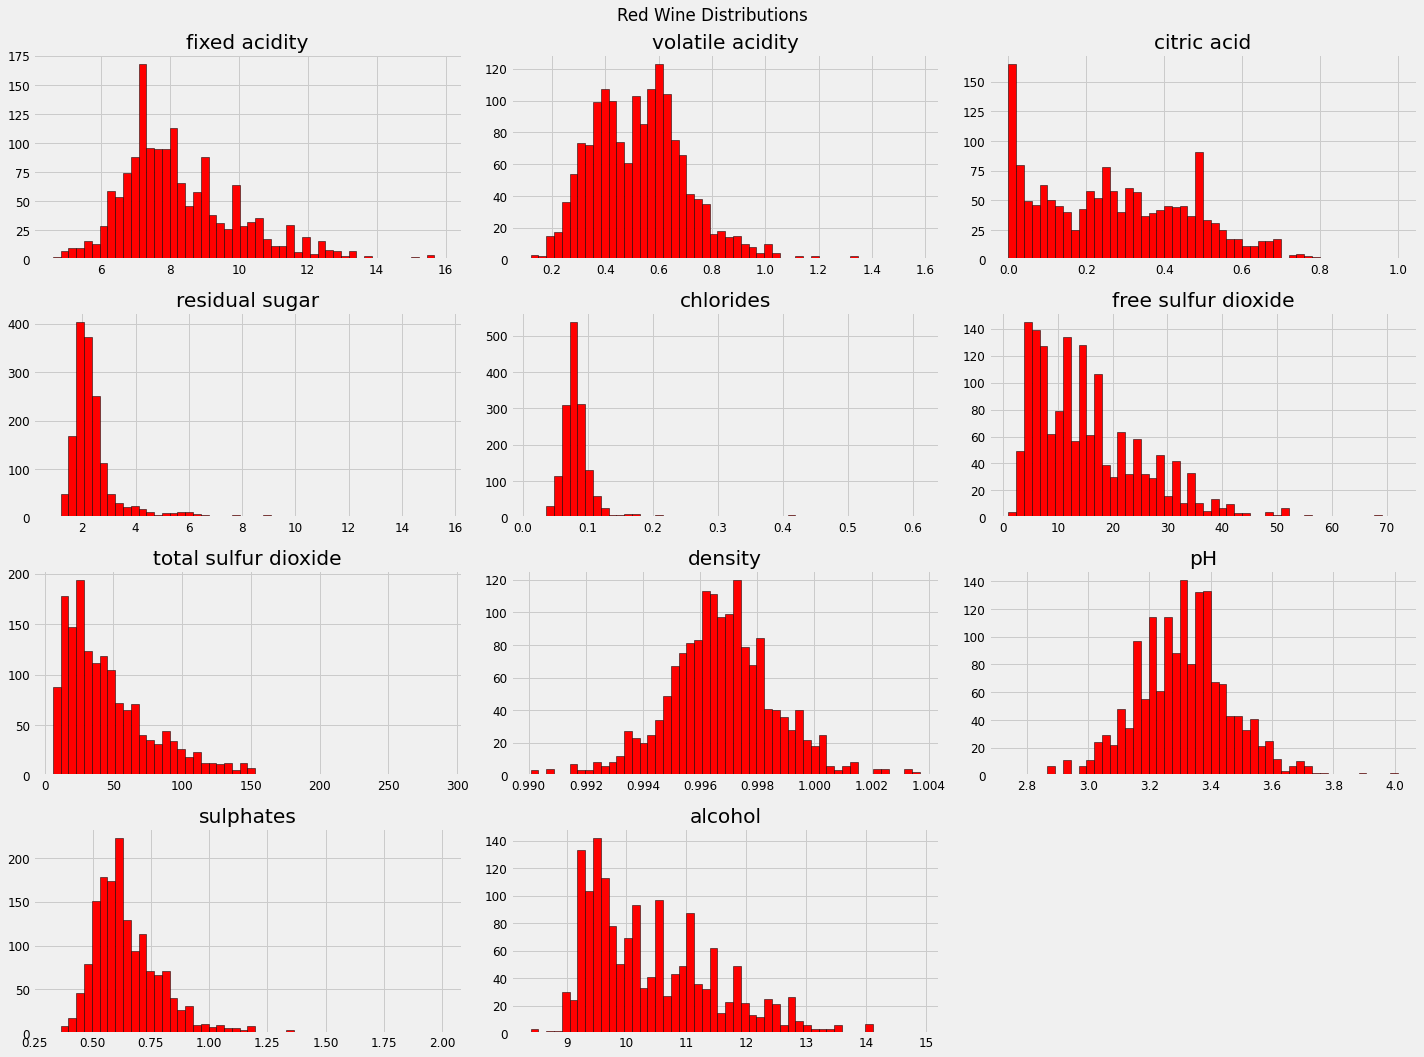

In [149]:
# Plot Pretty Pictures

reds[features].hist(bins=50, figsize=(20, 15), color='red', edgecolor='k')
plt.suptitle('Red Wine Distributions')
save_fig('red_wine_dist', resolution=72)
plt.show()

Saving figure white_wine_dist


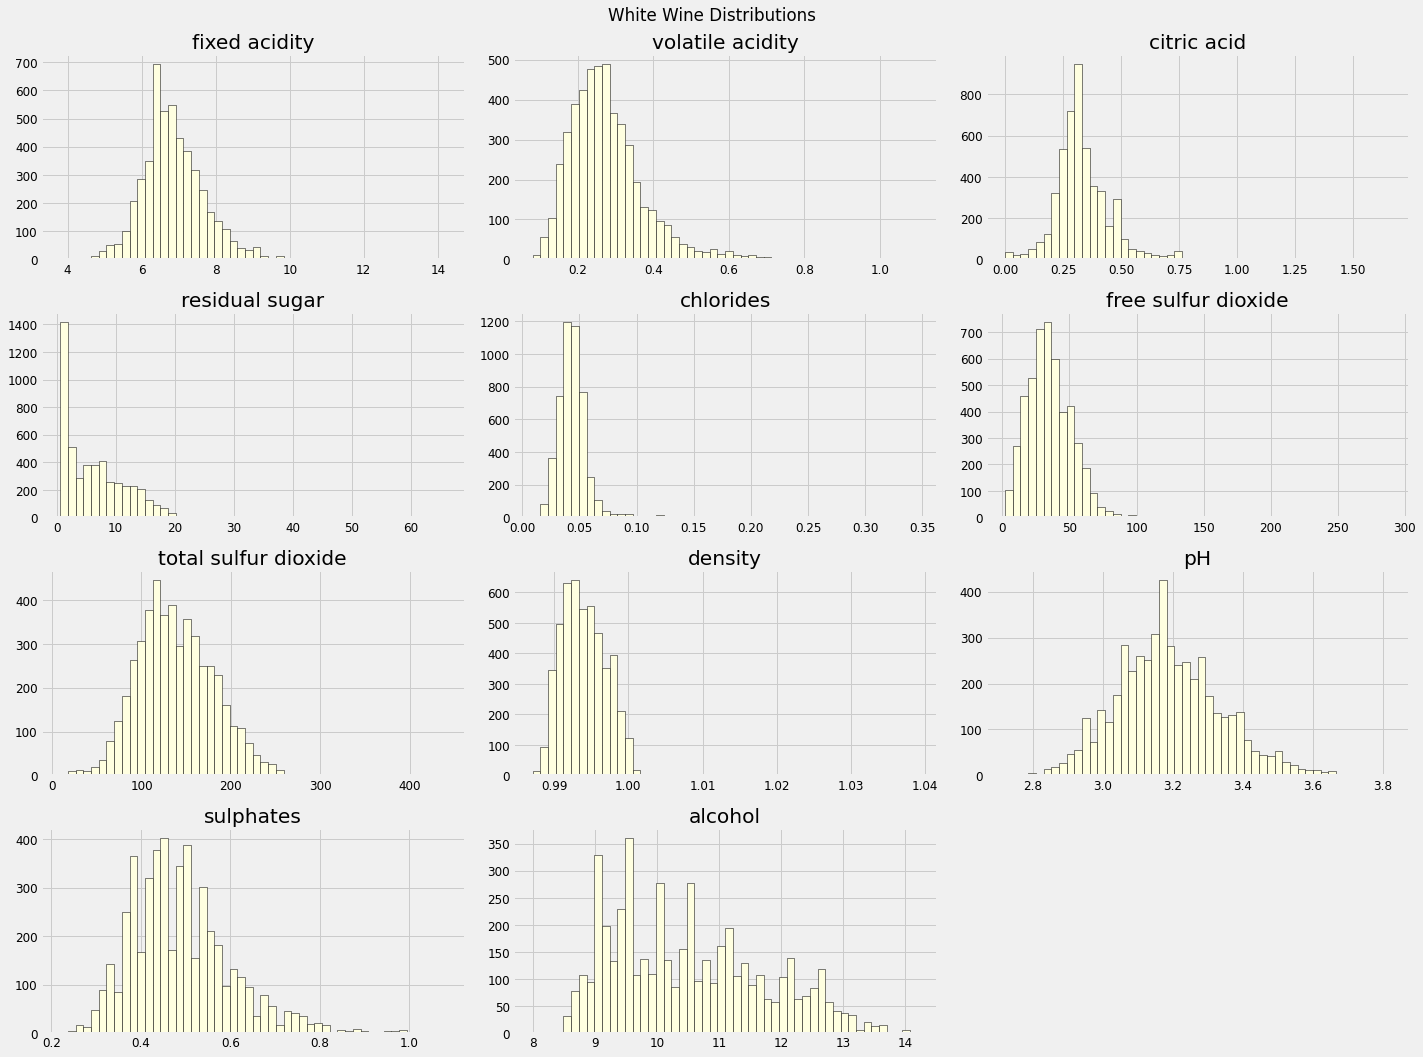

In [150]:
# Plot Pretty Pictures

whites[features].hist(bins=50, figsize=(20, 15), color='lightyellow', edgecolor='k')
plt.suptitle('White Wine Distributions')
save_fig('white_wine_dist', resolution=72)
plt.show()

# Target Distribution

Saving figure target_wine_dist


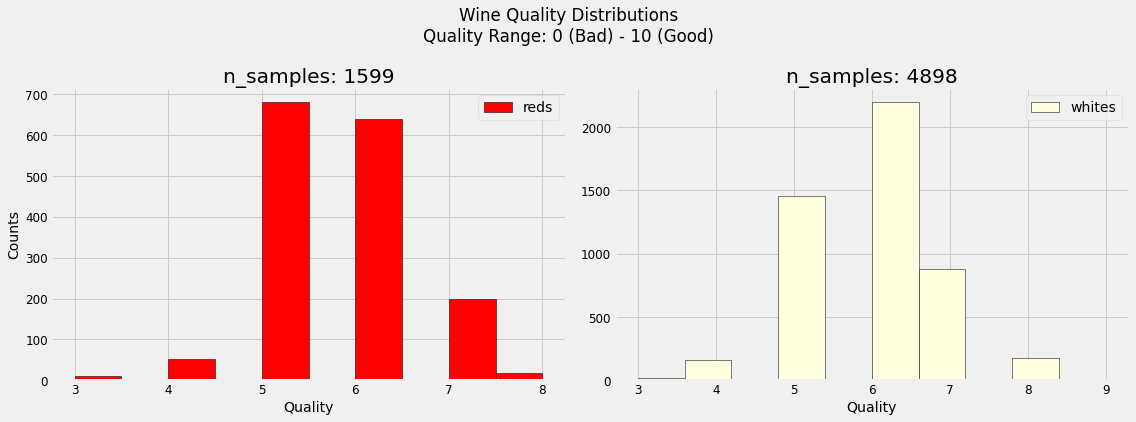

In [151]:
plt.figure(figsize=(16, 6))

# First plot 
plt.suptitle('Wine Quality Distributions\nQuality Range: 0 (Bad) - 10 (Good)')

plt.subplot(121)
reds[target].hist(color='r', edgecolor='k', label='reds')
plt.legend(loc='best')
plt.xlabel('Quality')
plt.title('n_samples: {}'.format(len(reds[target])))
plt.ylabel('Counts')

# Second plot

plt.subplot(122)
whites[target].hist(color='lightyellow', edgecolor='k', label='whites')
plt.legend(loc='best')
plt.title('n_samples: {}'.format(len(whites[target])))
plt.xlabel('Quality')

save_fig('target_wine_dist', resolution=72)
plt.show()

In [152]:
# Separate into Quality Groupings
# Say Wines of Quality <= 6 are low quality, > 6 are high quality

reds['class'] = reds['quality'].apply(lambda x:0 if x <=6 else 1)
whites['class'] = whites['quality'].apply(lambda x:0 if x <=6 else 1)


# Separate train and test sets

I am separating the training and testing data at this stage so that my analysis are not biased. Ideally this should be done before any analysis has been performed, but to keep the sample populations evenly distributed, I elected to do this step after the analysis and grouping by using the stratify argument. This also allowed me to develop a good train/val/test split for each type of wine as the number of red samples is small enough to require a different split than the whites.

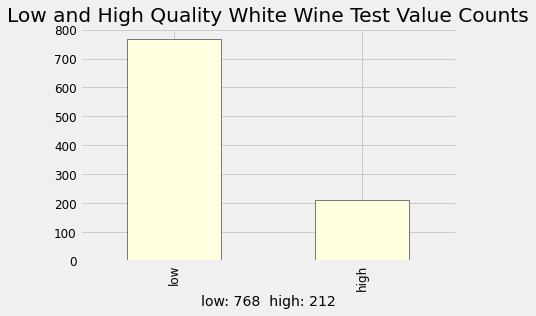

In [153]:
# White wines

# shuffle the data
whites = whites.sample(frac=1, random_state = 0)

X = whites.drop('class', axis=1)
y = whites['class']

# 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=0)

# plot class value counts
y_test.value_counts().plot(kind='bar', color='lightyellow', edgecolor='k')
plt.xticks(ticks = [0, 1], labels=['low', 'high'])
plt.title('Low and High Quality White Wine Test Value Counts')
plt.xlabel('low: {}  high: {}'.format(y_test.value_counts().loc[0], y_test.value_counts().loc[1]))
plt.show()

# combine into training and testing data frames
white_train = pd.concat([X_train, y_train], axis=1)
white_test = pd.concat([X_test, y_test], axis=1)

# Save the data
pd.to_pickle(white_train,'./data/white_train.pkl')
pd.to_pickle(white_test,'./data/white_test.pkl')

whites = white_train
whites['type'] = 'white'

In [154]:
y_test.value_counts().loc[0]

768

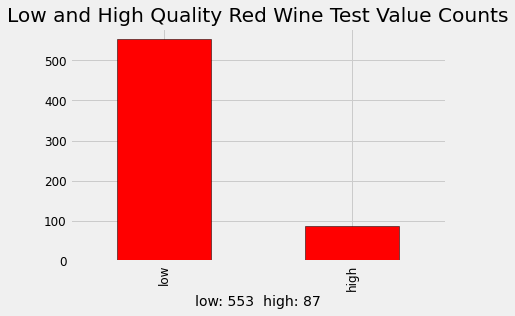

In [155]:
# Red wines

# shuffle the data
reds = reds.sample(frac=1, random_state = 0)

X = reds.drop('class', axis=1)
y = reds['class']

# 60/40 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, stratify=y, random_state=0)

# plot class value counts
y_test.value_counts().plot(kind='bar', color='red', edgecolor='k')
plt.xticks(ticks = [0, 1], labels=['low', 'high'])
plt.title('Low and High Quality Red Wine Test Value Counts')
plt.xlabel('low: {}  high: {}'.format(y_test.value_counts().loc[0], y_test.value_counts().loc[1]))
plt.show()

# combine into training and testing data frames
red_train = pd.concat([X_train, y_train], axis=1)
red_test = pd.concat([X_test, y_test], axis=1)

# Save the data
pd.to_pickle(red_train,'./data/red_train.pkl')
pd.to_pickle(red_test,'./data/red_test.pkl')

reds = red_train
reds['type'] = 'red'

# Visual Data Explorations

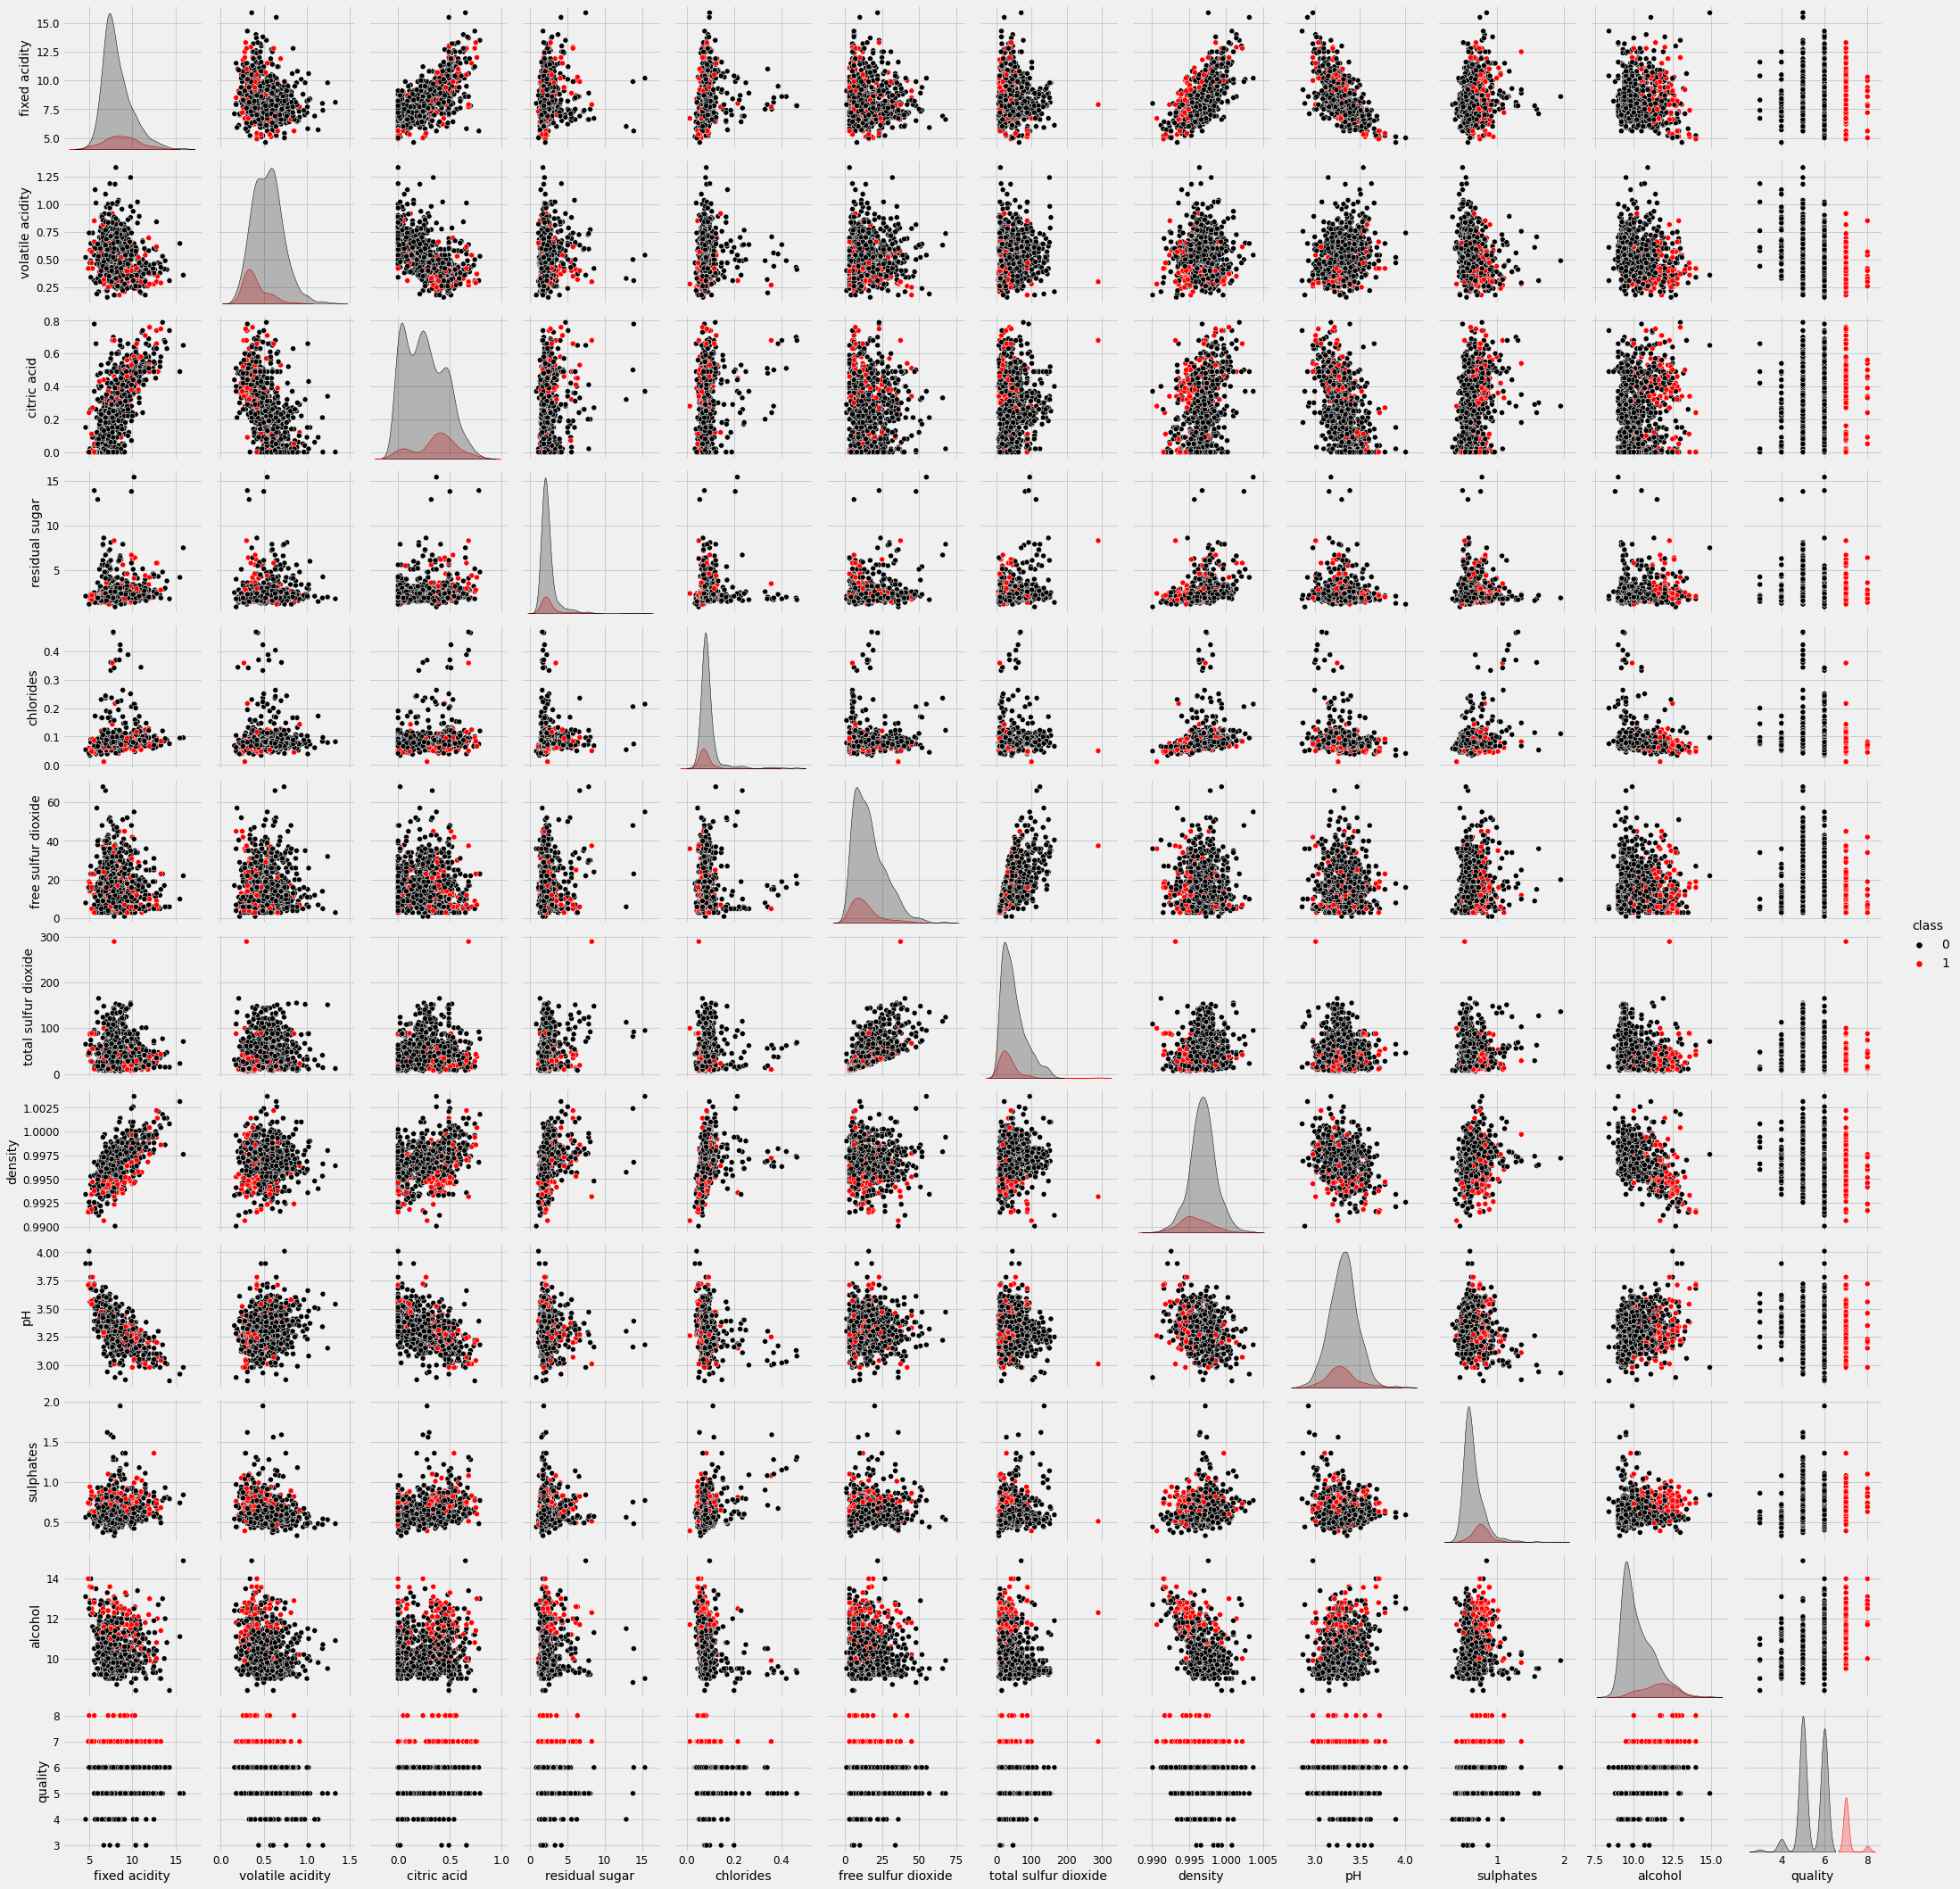

CPU times: user 53.1 s, sys: 1.1 s, total: 54.2 s
Wall time: 57.5 s


In [104]:
%%time 
sns.pairplot(reds, hue='class', palette=['black', 'red'], kind='scatter')
plt.show()


There appears to be a good class separation for sulphates and alcohol in the red wines dataset. We can also see that there is a large degree of collinearity in some of the features. For example the fixed acidity xs pH plot demonstrates some linear correlation with heteroscedasticity. There are also features that would benefit from scaling transformations, such as the chlorides. There are also some clear outliers (see extreme positive class example in total sulfur dioxide vs alcohol).

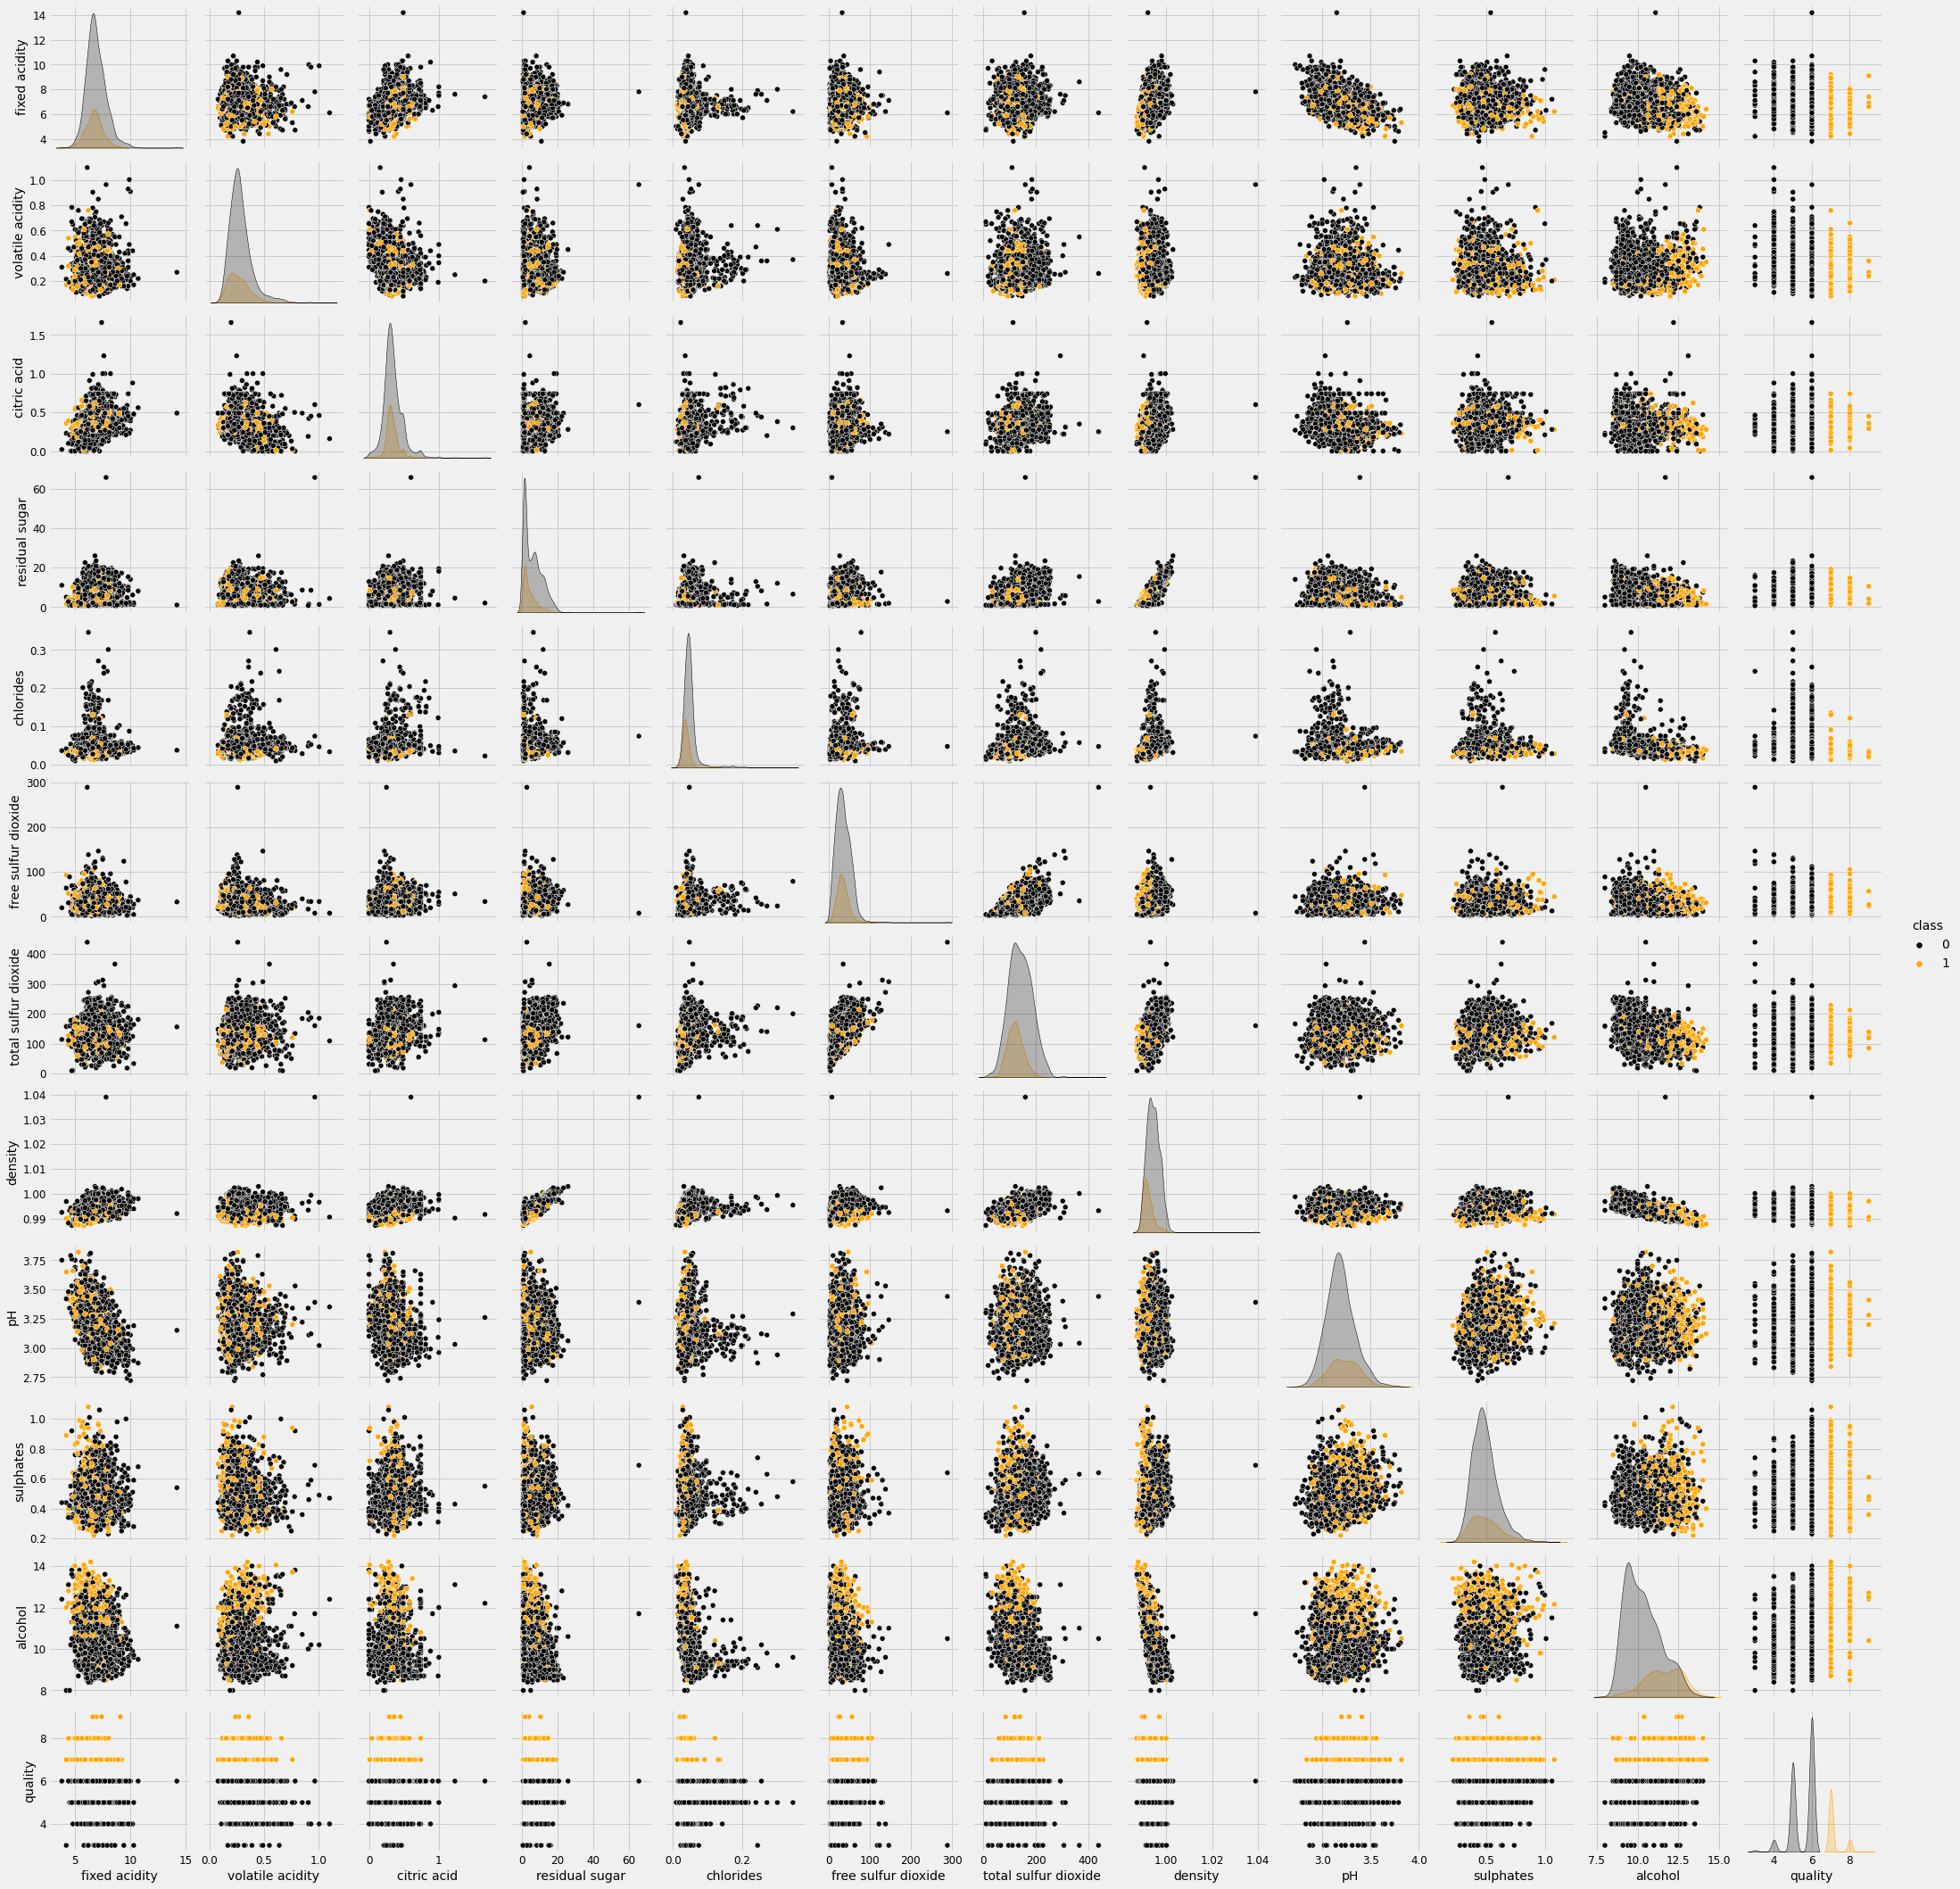

In [105]:
sns.pairplot(whites, hue='class', palette=['black', 'orange'], kind='scatter')
plt.show()

Alcohol seems to be a huge factor here just as in the last plot, some transformations hopefully can tease out some of the distibutions. There is a problem with outliers here, more so in the red. And unlike the red, I feel comfortable removing them if they are of the majority class. 

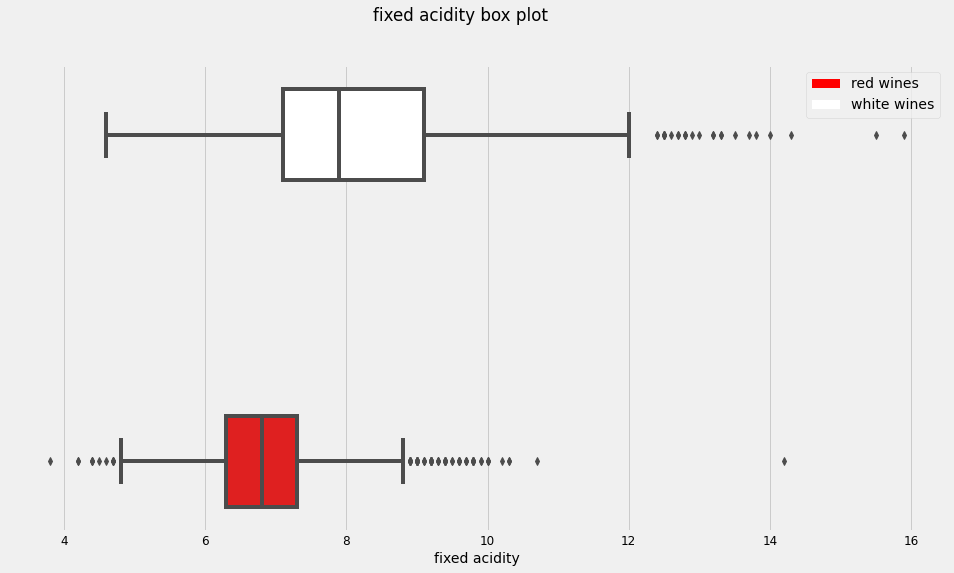

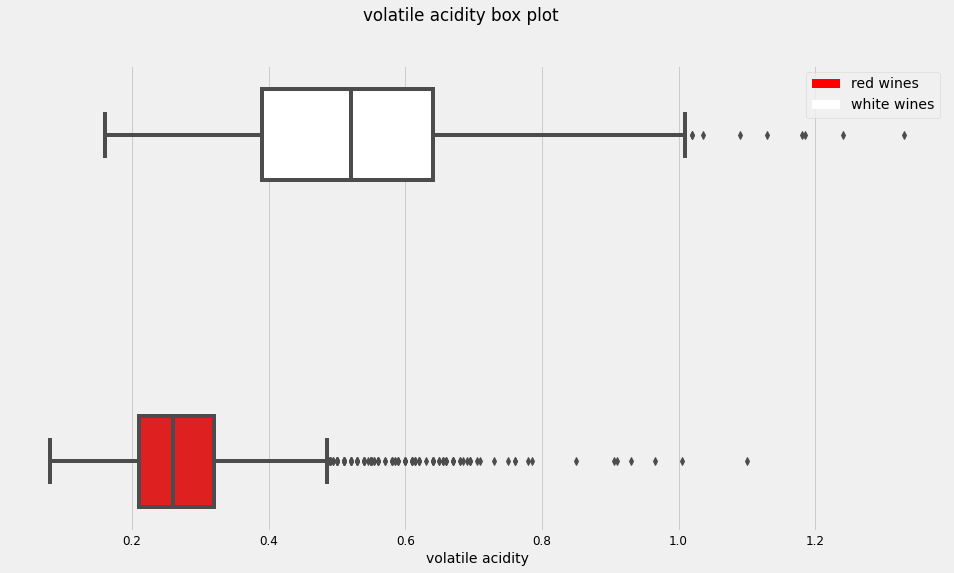

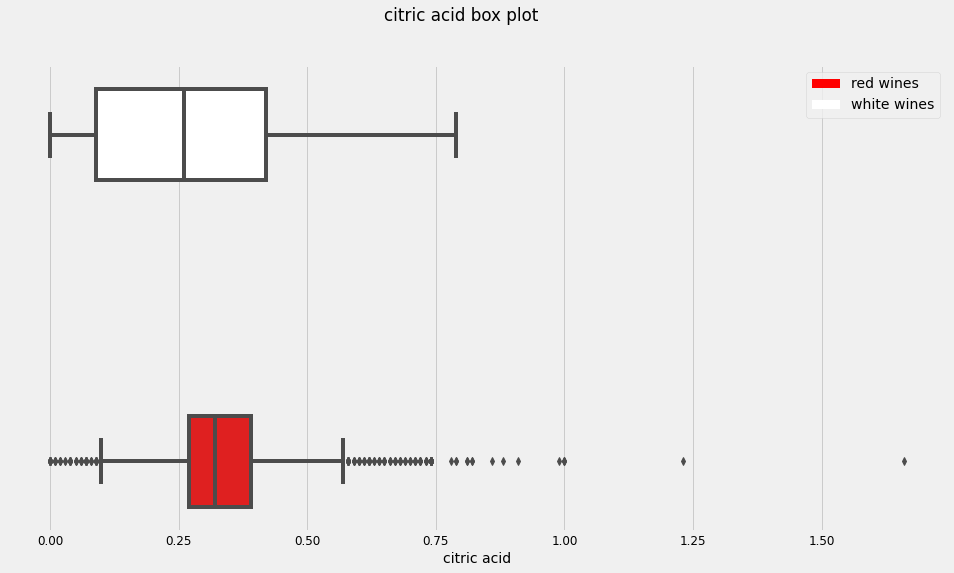

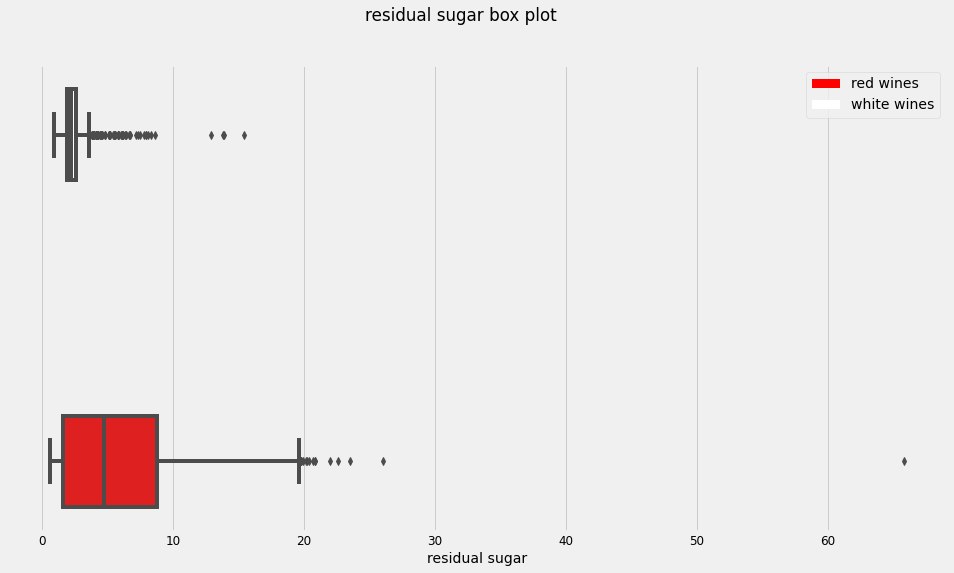

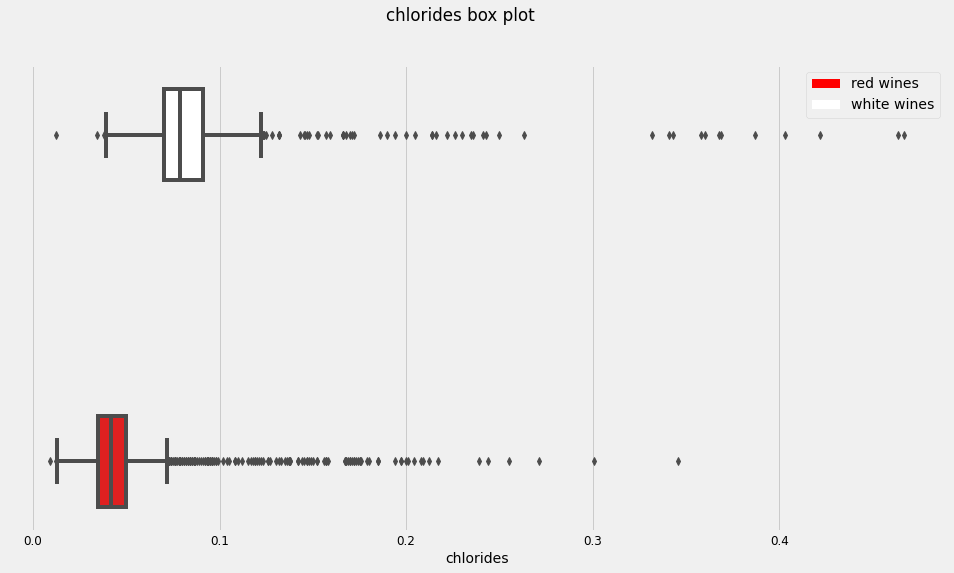

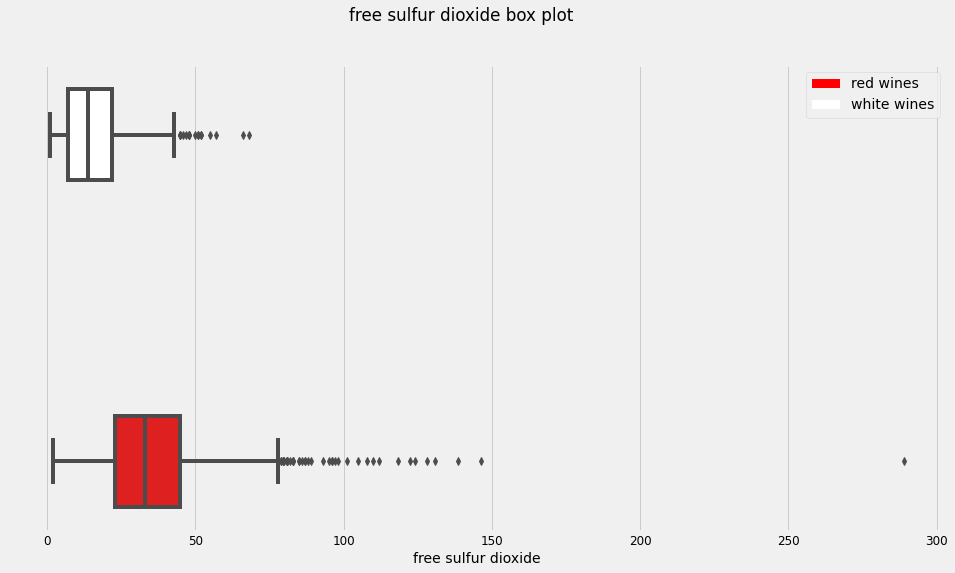

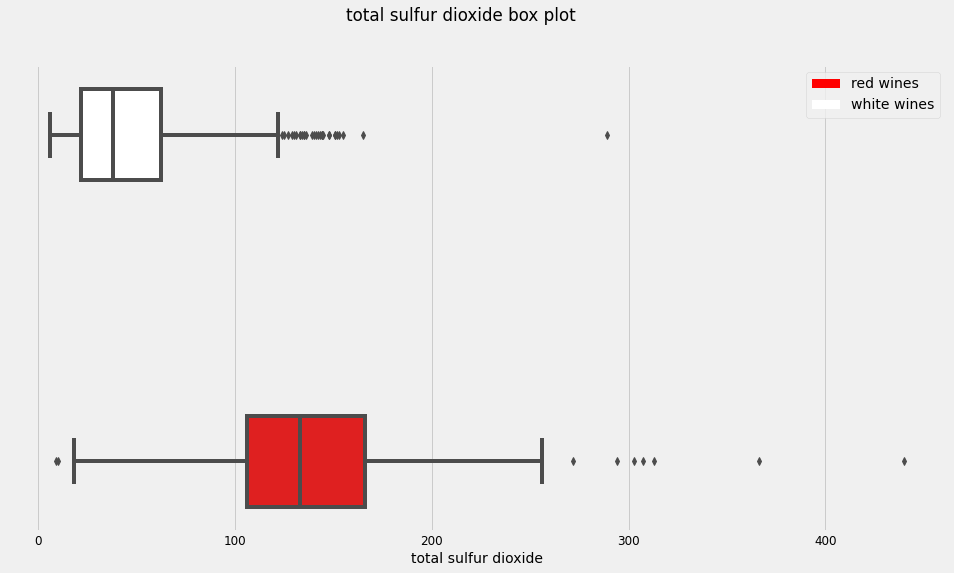

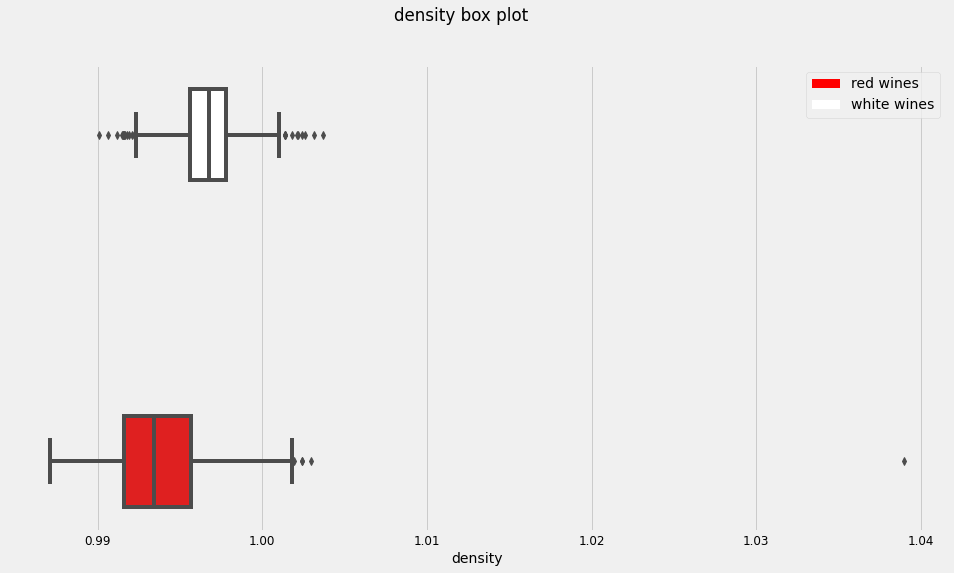

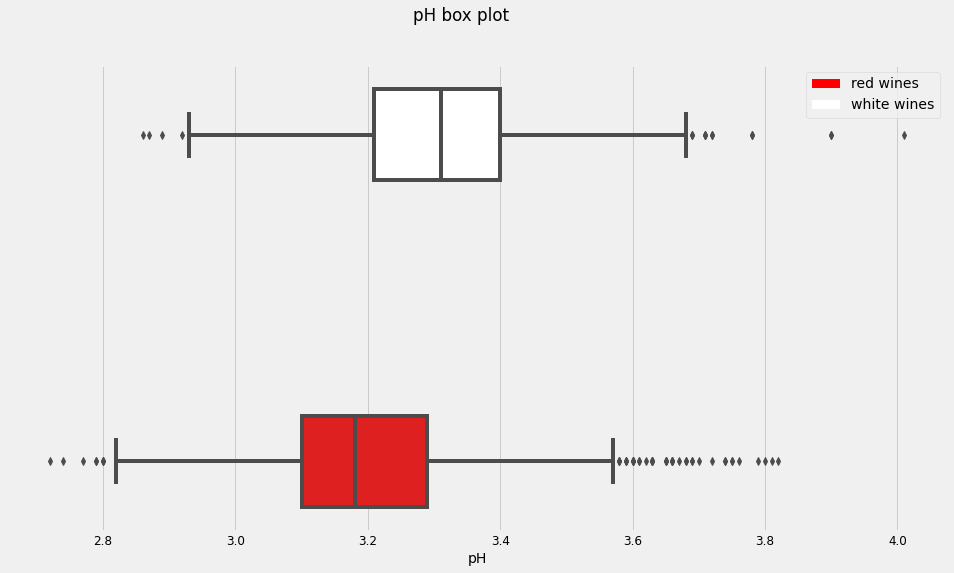

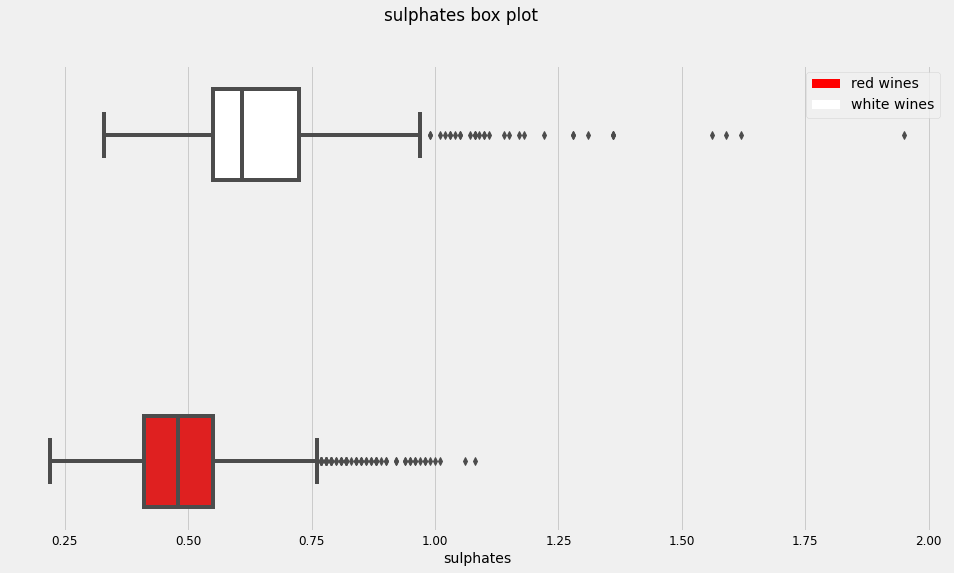

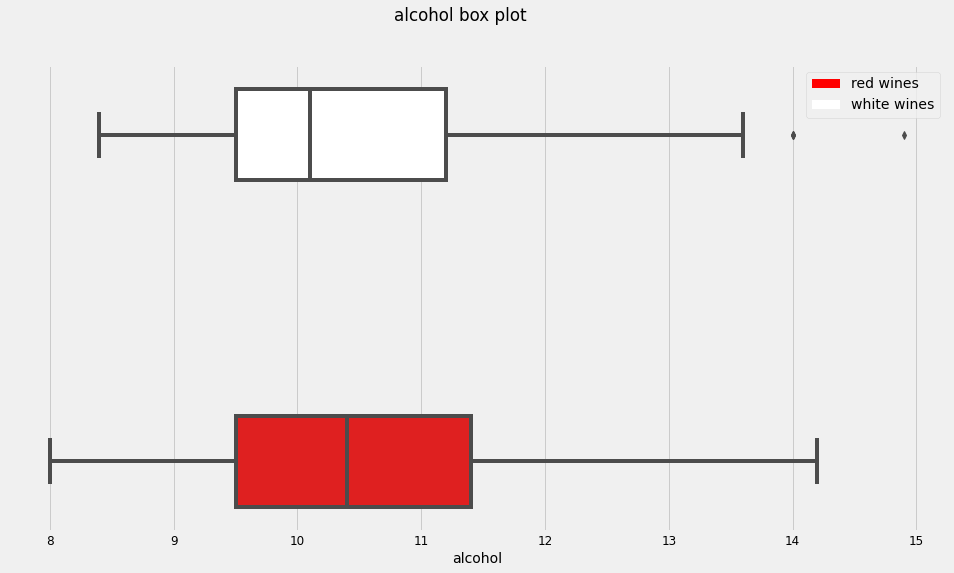

In [106]:
reds['type'] = 'red'
whites['type'] = 'white'
wines = reds.append(whites)
for i in range(len(features)):
    fig, ax = plt.subplots(figsize=(15, 8))

    sns.boxplot(y='type', x=features[i], data=wines, orient="h", ax=ax, hue='type', palette=['white', 'red'])

    ax.get_yaxis().set_visible(False)

    fig.suptitle(f"{features[i]} box plot")

    color_patches = [
        Patch(facecolor="red", label="red wines"),
        Patch(facecolor="white", label="white wines")
    ]
    ax.legend(handles=color_patches)
    plt.ylabel('wine type')
    plt.show()

In [107]:
wines_new

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
531            13.2              0.38         0.55             2.7      0.081   
1330            7.0              0.56         0.13             1.6      0.077   
19              7.6              0.39         0.31             2.3      0.082   
1235            6.0              0.54         0.06             1.8      0.050   
1168            5.2              0.49         0.26             2.3      0.090   
...             ...               ...          ...             ...        ...   
2864            6.9              0.33         0.31             4.2      0.040   
1732            6.6              0.23         0.27             5.6      0.043   
1742            8.2              0.17         0.32             1.5      0.050   
1444            8.1              0.31         0.24             1.6      0.032   
339             7.1              0.27         0.31            18.2      0.046   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
531                   5.0                  16.0  1.00060  2.98       0.54   
1330                 25.0                  42.0  0.99629  3.34       0.59   
19                   23.0                  71.0  0.99820  3.52       0.65   
1235                 38.0                  89.0  0.99236  3.30       0.50   
1168                 23.0                  74.0  0.99530  3.71       0.62   
...                   ...                   ...      ...   ...        ...   
2864                 21.0                  93.0  0.98960  3.18       0.48   
1732                 43.0                 164.0  0.99530  3.27       0.76   
1742                 17.0                 101.0  0.99400  3.14       0.58   
1444                 10.0                  67.0  0.99240  3.08       0.47   
339                  55.0                 252.0  1.00000  3.07       0.56   

      alcohol  quality  class   type  
531      9.40        5      0    red  
1330     9.20        5      0    red  
19       9.70        5      0    red  
1235    10.55        6      0    red  
1168    12.20        6      0    red  
...       ...      ...    ...    ...  
2864    13.40        7      1  white  
1732     9.50        5      0  white  
1742     9.50        5      0  white  
1444    10.50        5      0  white  
339      8.70        5      0  white  

[3637 rows x 14 columns]

In [108]:
# Remove outliers with zcores
z_scores = stats.zscore(reds[features])
reds_new = reds[(np.abs(z_scores) < 3).all(axis=1)]

z_scores = stats.zscore(whites[features])
whites_new = whites[(np.abs(z_scores) < 3).all(axis=1)]

print('whites', len(whites_new) / len(whites))
print('reds', len(reds_new) / len(reds))
print()
print('white class remaining')
print(whites_new['class'].value_counts() / whites['class'].value_counts())
print()
print('red class remaining')
print(reds_new['class'].value_counts() / reds['class'].value_counts())

whites 0.9147727272727273
reds 0.9067484662576687

white class remaining
0    0.902711
1    0.960606
Name: class, dtype: float64

red class remaining
0    0.903546
1    0.927273
Name: class, dtype: float64


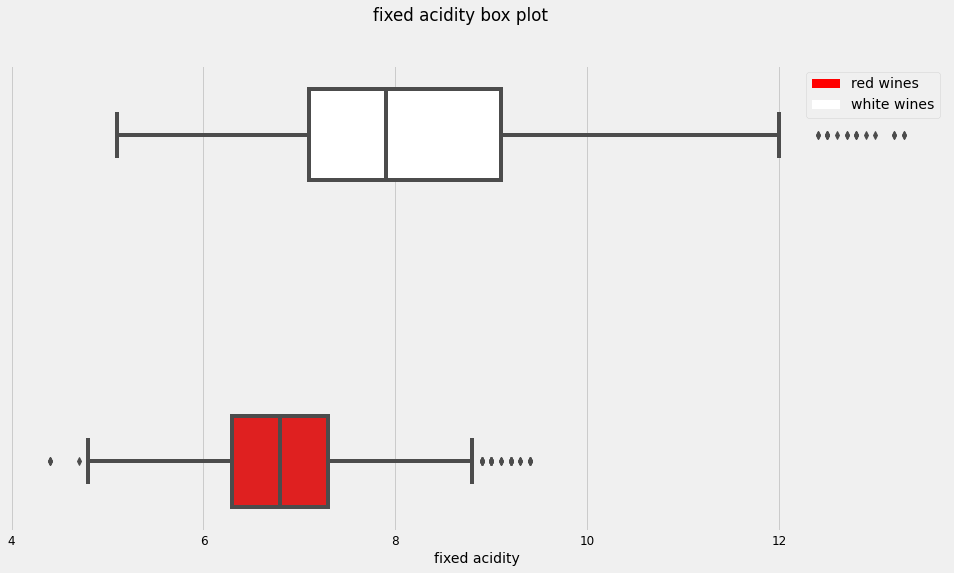

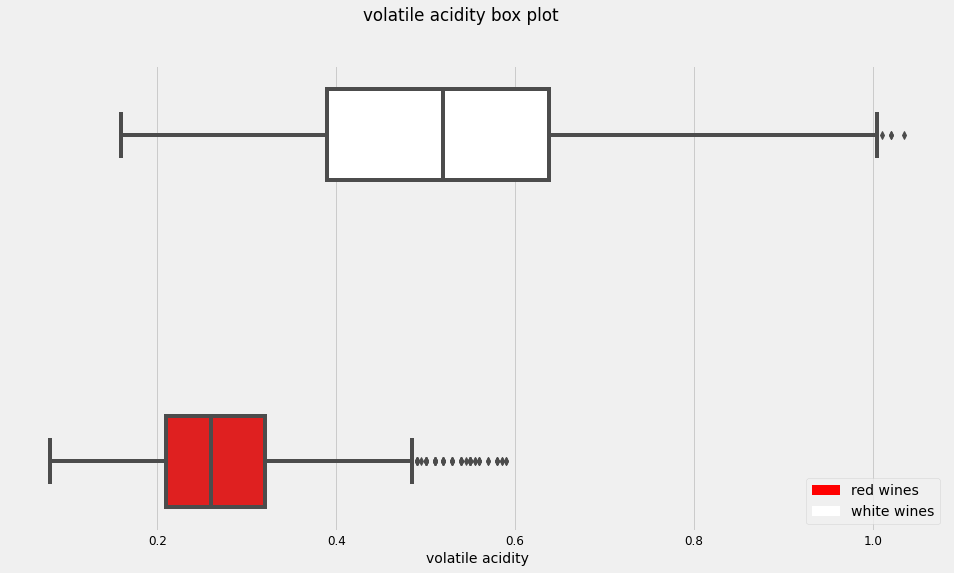

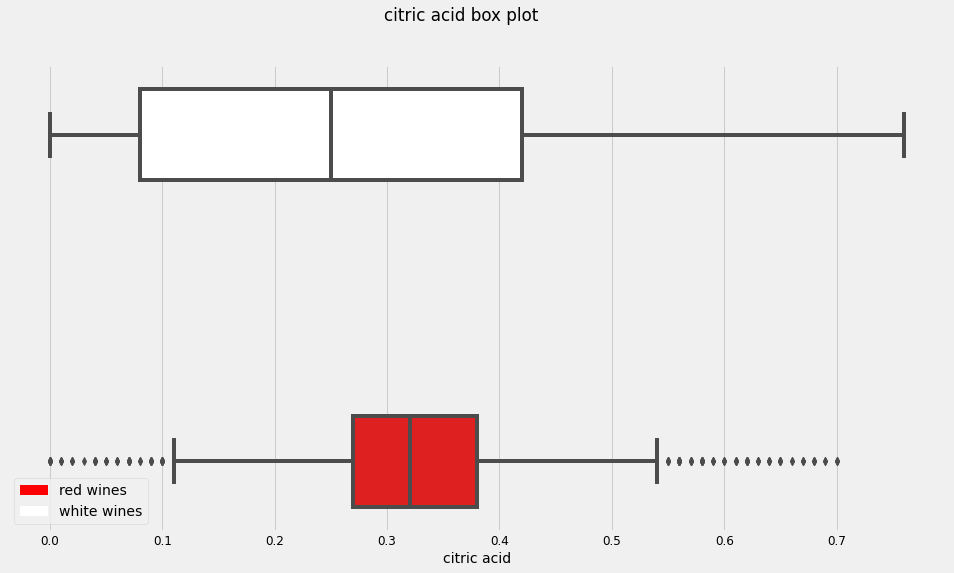

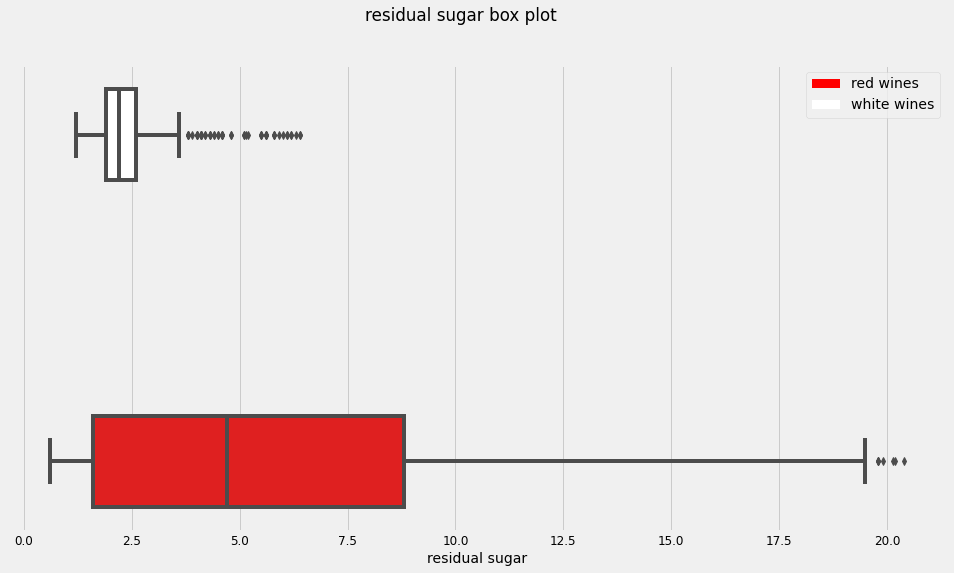

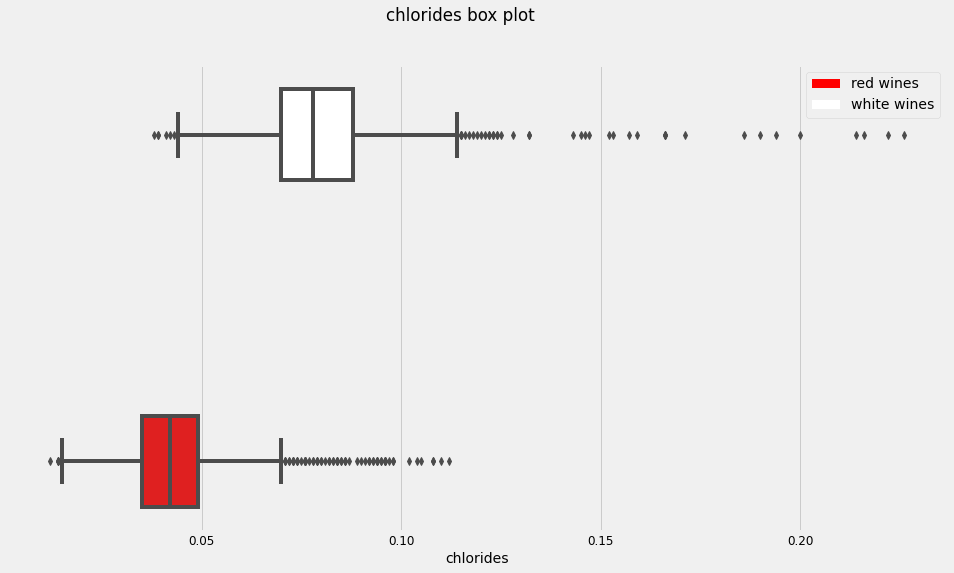

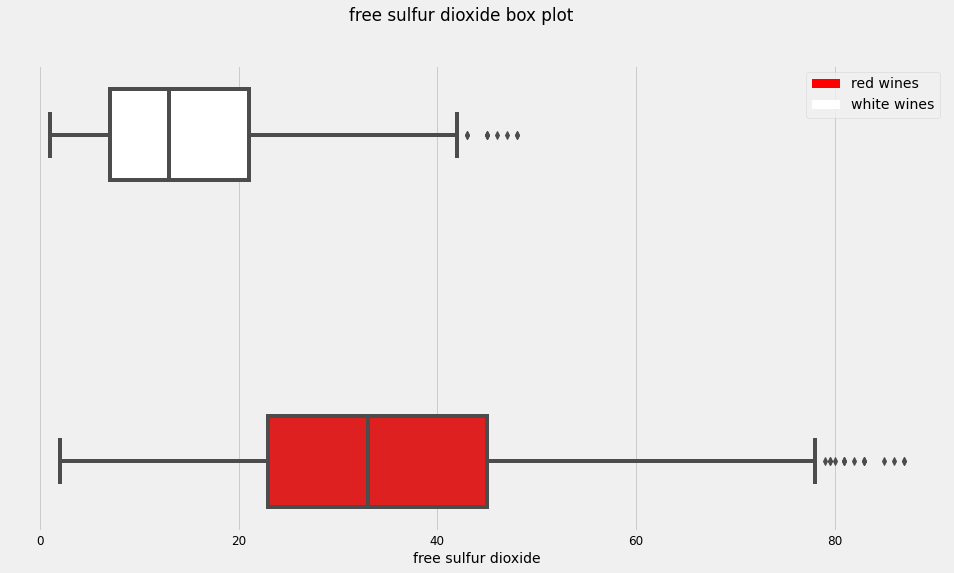

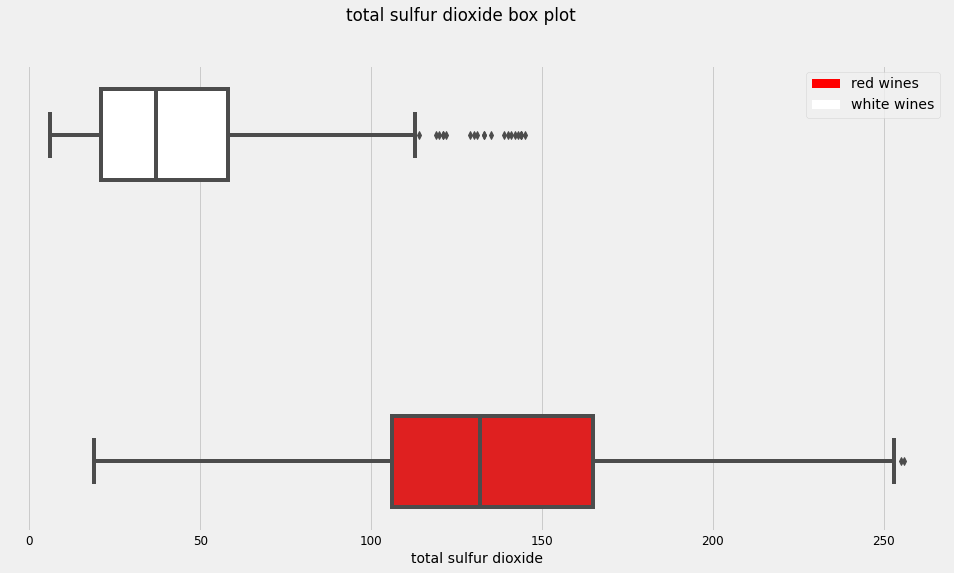

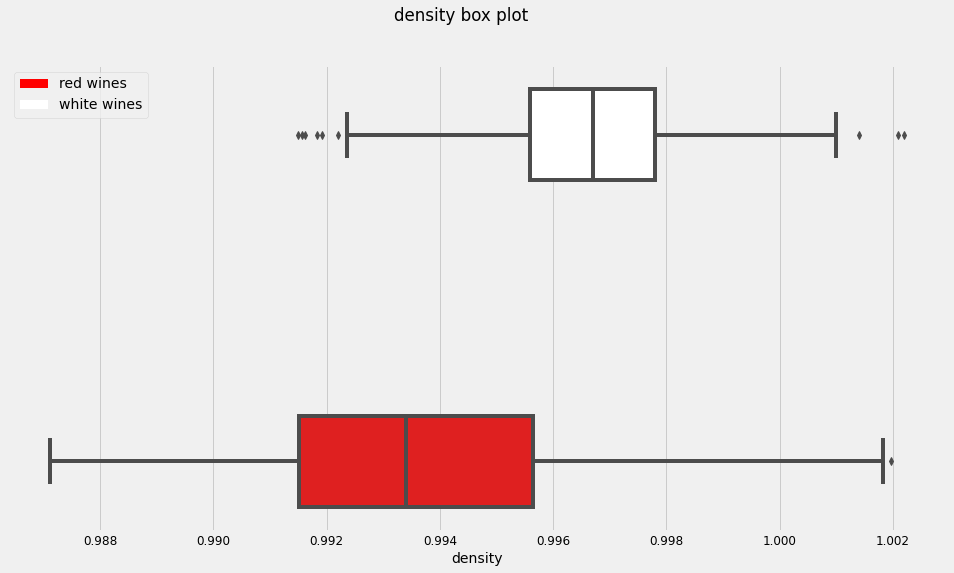

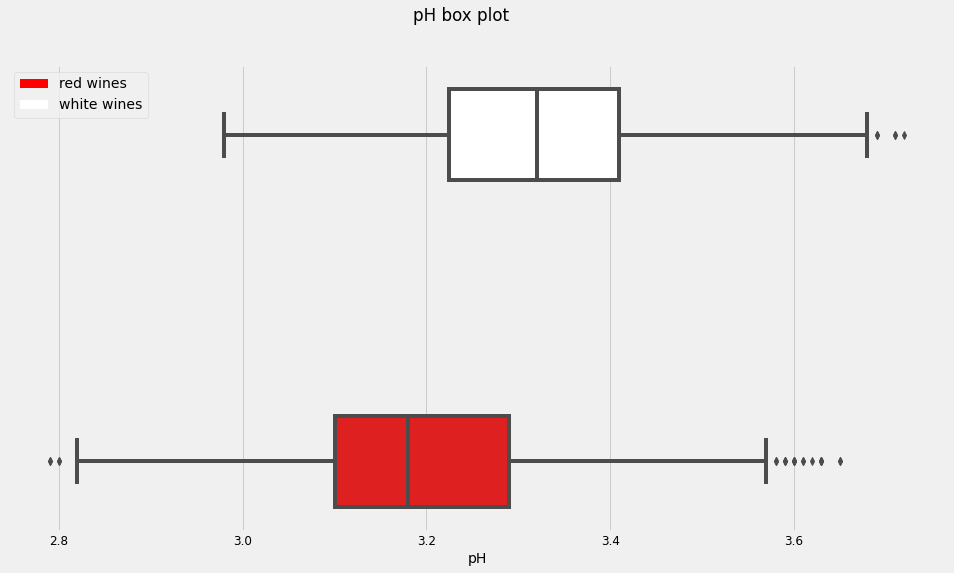

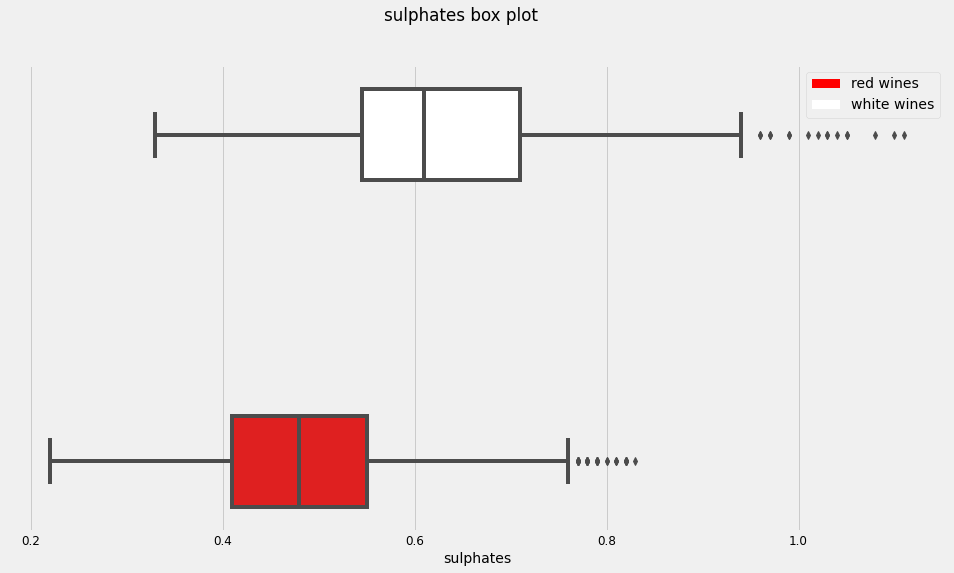

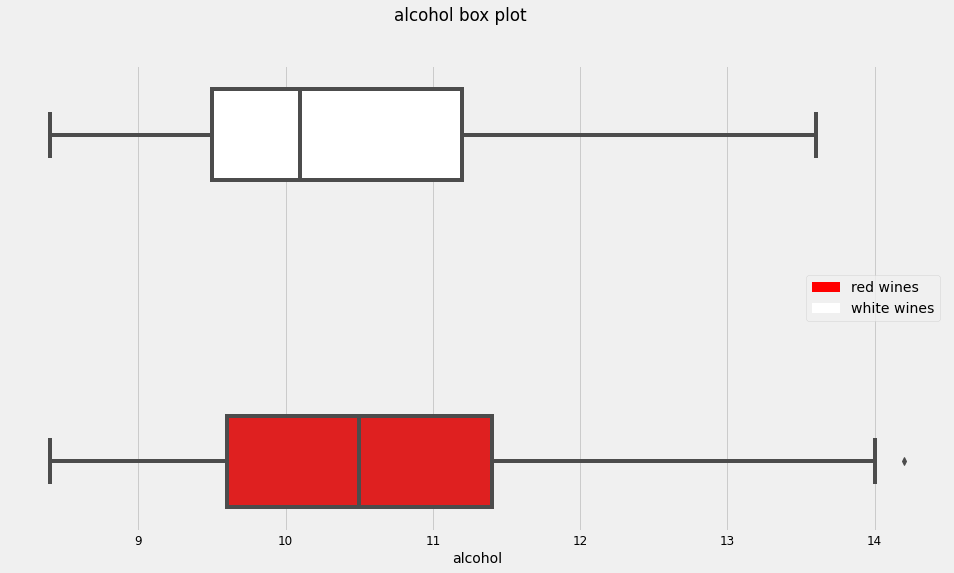

In [109]:
wines_new = reds_new.append(whites_new)
for i in range(len(features)):
    fig, ax = plt.subplots(figsize=(15, 8))

    sns.boxplot(y='type', x=features[i], data=wines_new, orient="h", ax=ax, hue='type', palette=['white', 'red'])

    ax.get_yaxis().set_visible(False)

    fig.suptitle(f"{features[i]} box plot")

    color_patches = [
        Patch(facecolor="red", label="red wines"),
        Patch(facecolor="white", label="white wines")
    ]
    ax.legend(handles=color_patches)
    plt.ylabel('wine type')
    plt.show()

In [111]:
reds_tsfm = reds_new.copy(deep=True)
whites_tsfm = whites_new.copy(deep=True)

reds_tsfm[features] = PowerTransformer().fit_transform(StandardScaler().fit_transform(reds_new[features]))
whites_tsfm[features] = PowerTransformer().fit_transform(StandardScaler().fit_transform(whites_new[features]))

wines_tsfm = reds_tsfm.append(whites_tsfm)

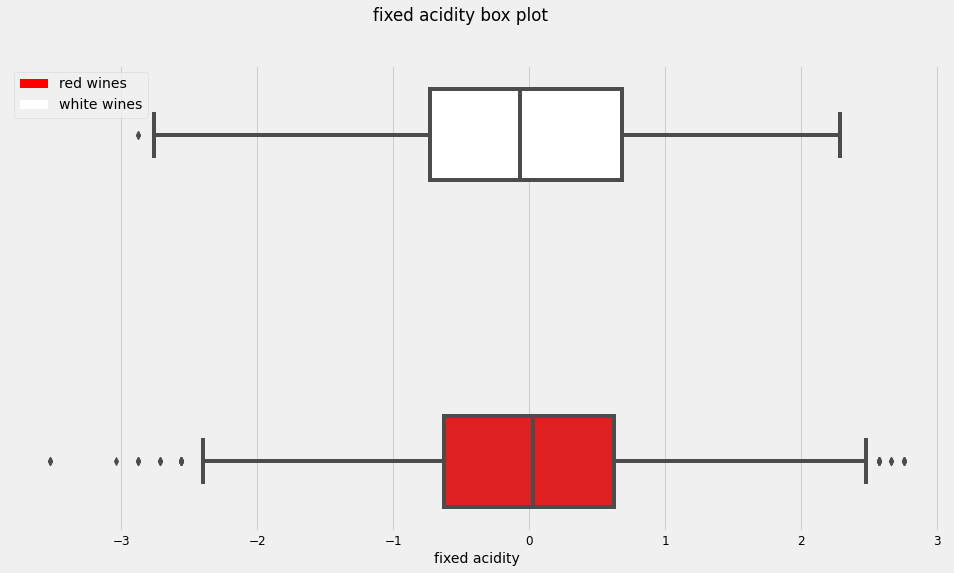

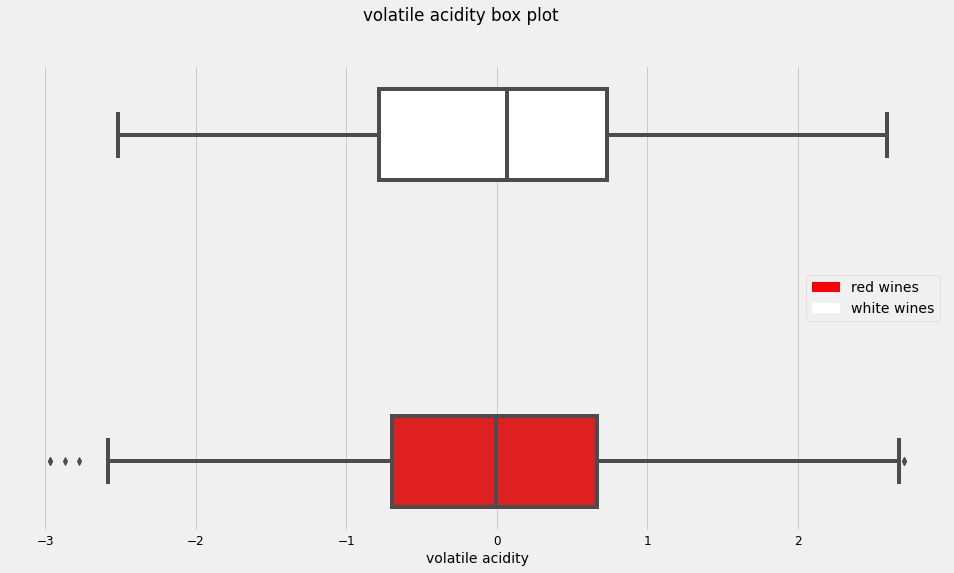

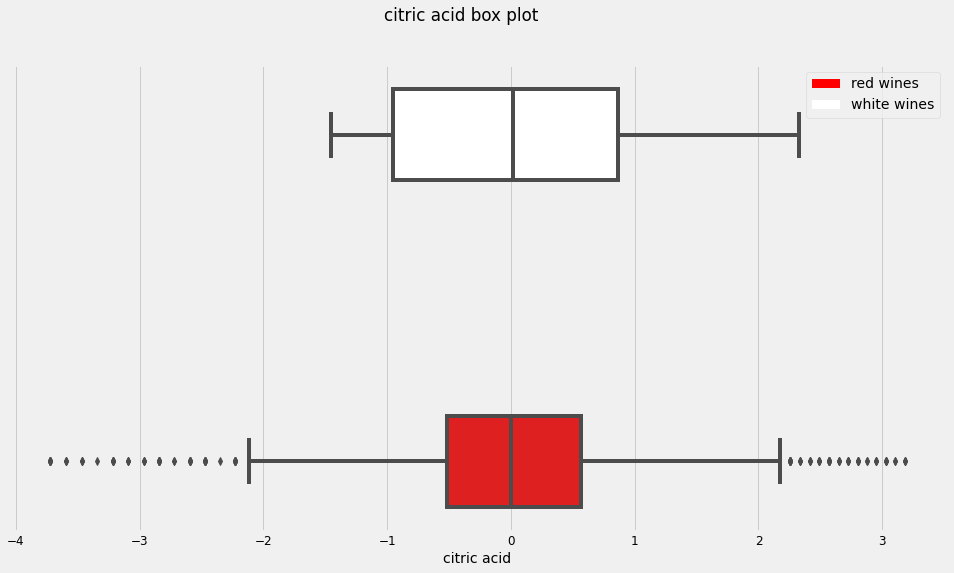

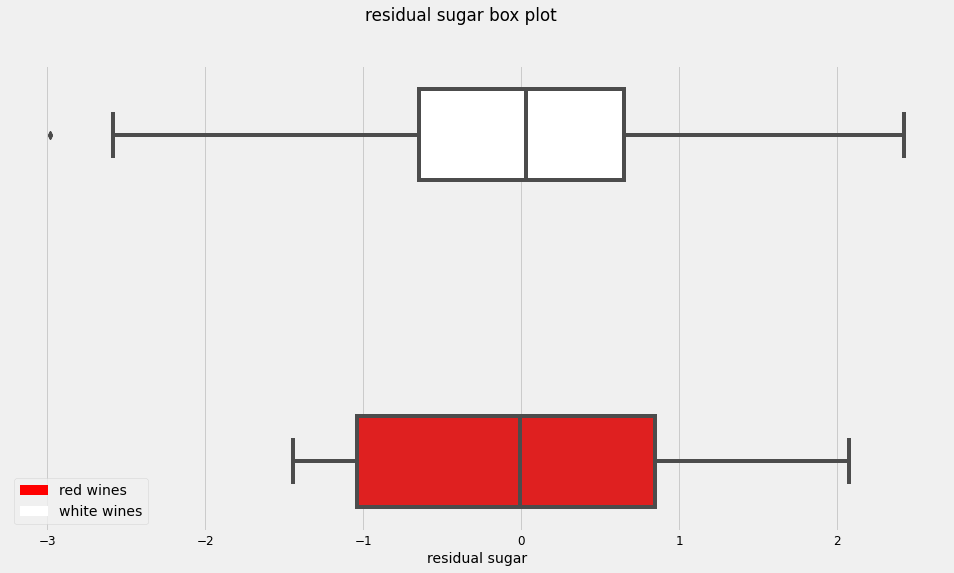

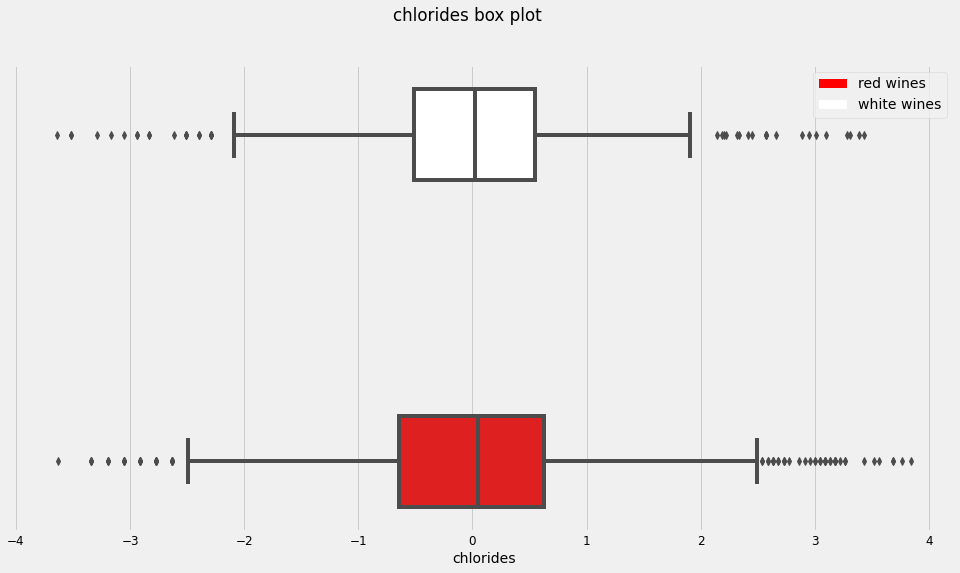

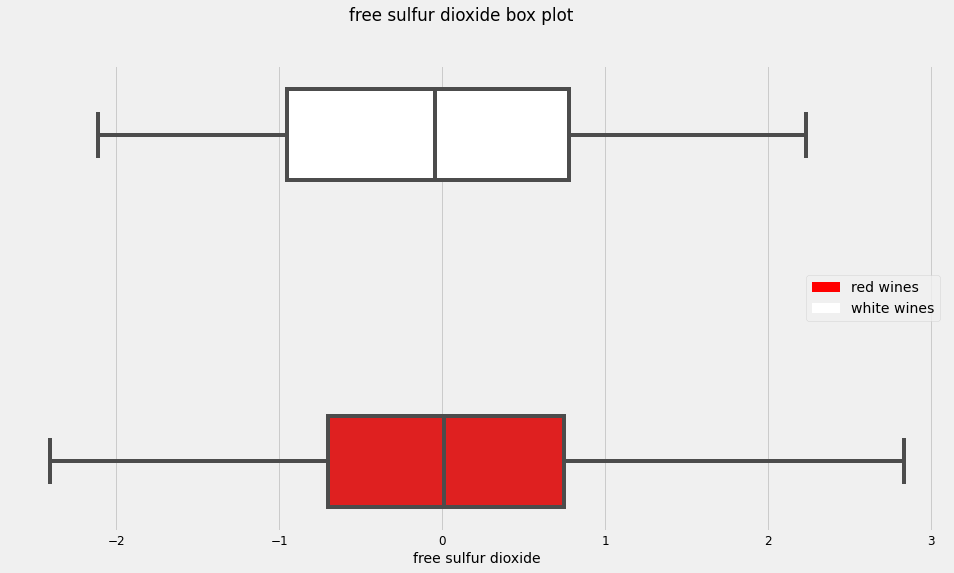

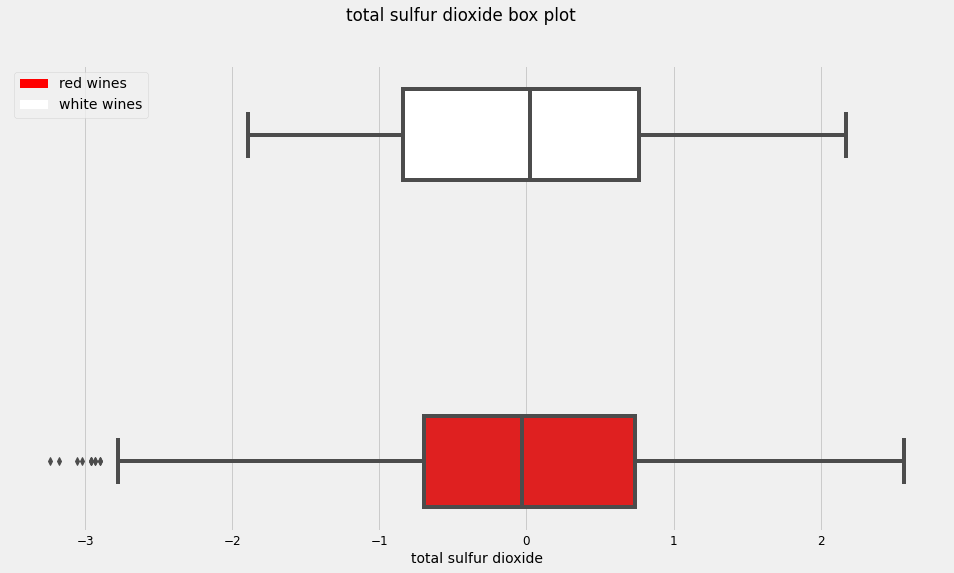

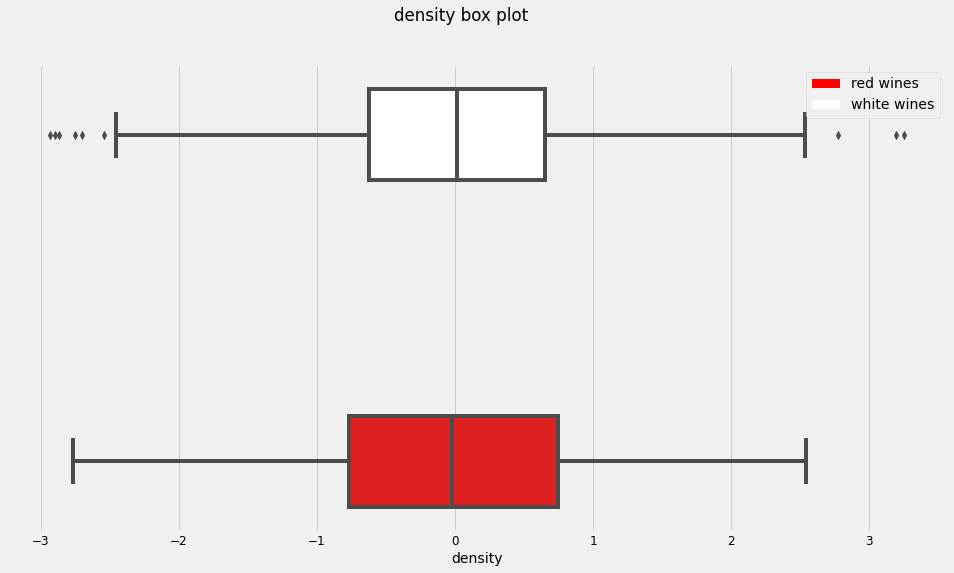

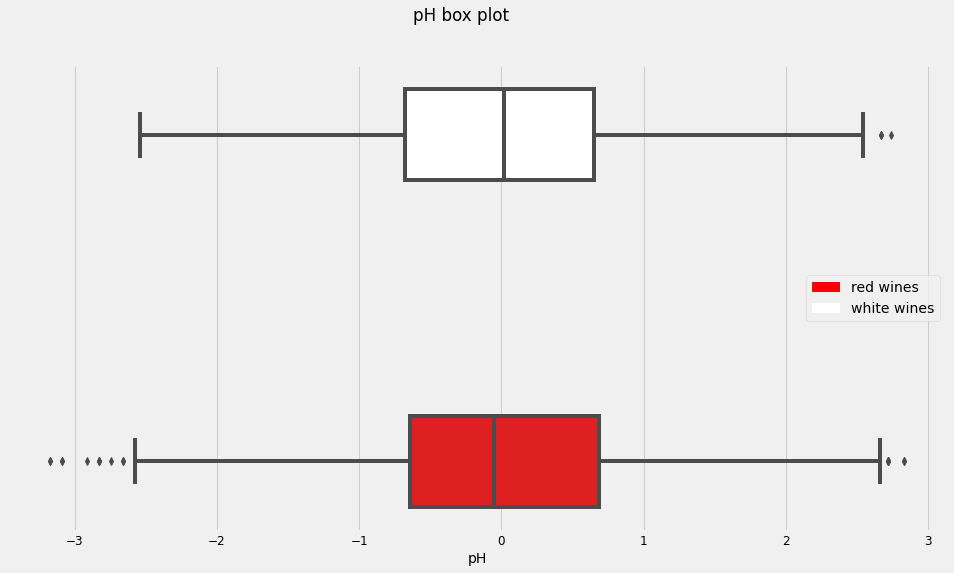

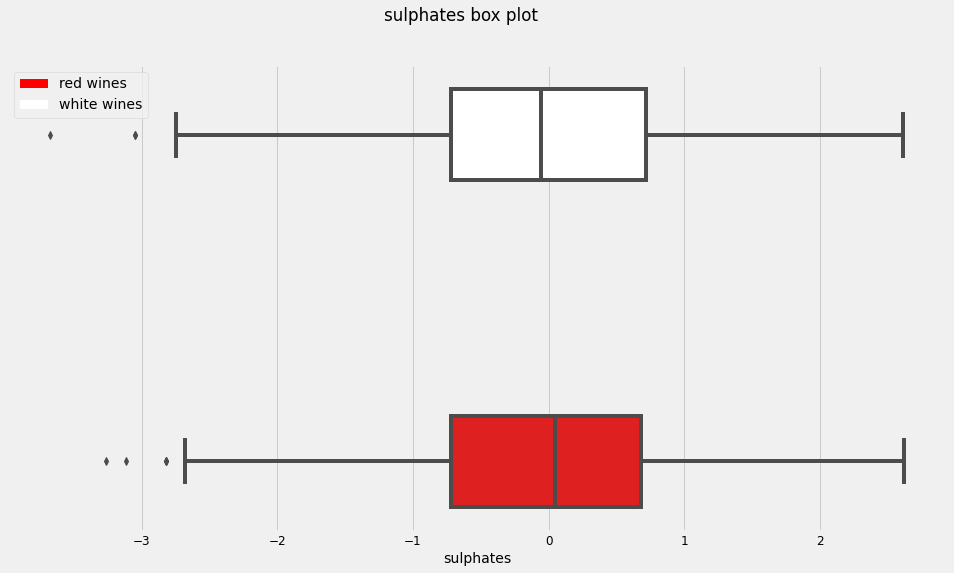

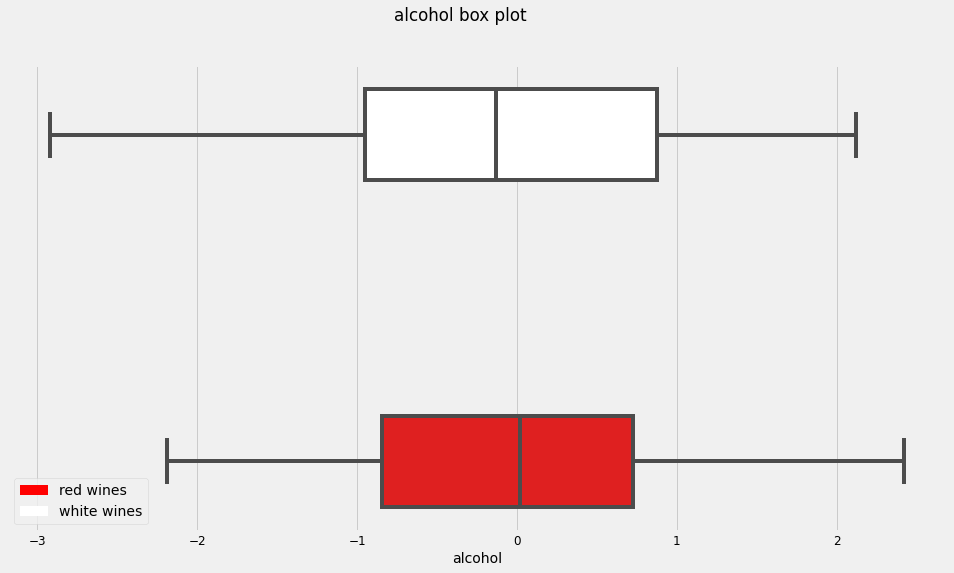

In [112]:

for i in range(len(features)):
    fig, ax = plt.subplots(figsize=(15, 8))

    sns.boxplot(y='type', x=features[i], data=wines_tsfm, orient="h", ax=ax, hue='type', palette=['white', 'red'])

    ax.get_yaxis().set_visible(False)

    fig.suptitle(f"{features[i]} box plot")

    color_patches = [
        Patch(facecolor="red", label="red wines"),
        Patch(facecolor="white", label="white wines")
    ]
    ax.legend(handles=color_patches)
    plt.ylabel('wine type')
    plt.show()

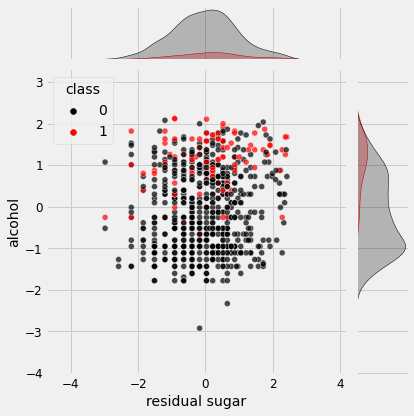

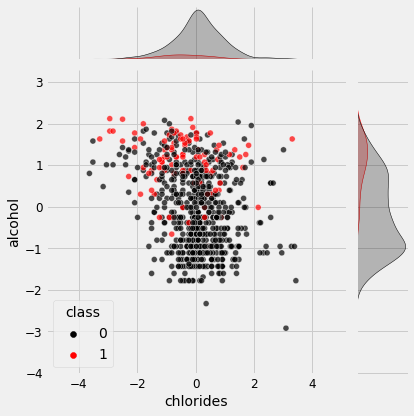

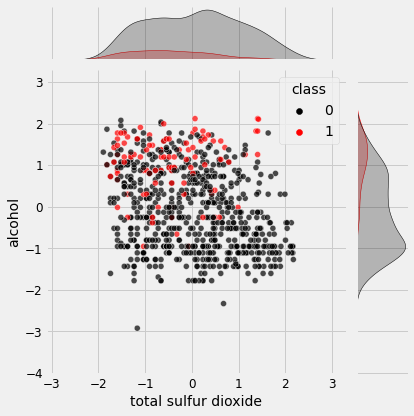

In [113]:
# just to look at how features changed

[sns.jointplot(data=reds_tsfm, x=feature, y='alcohol', hue='class', palette=['black', 'red'], alpha=0.7) for feature in ['residual sugar','chlorides', 'total sulfur dioxide']]
plt.show()

## Feature Selection
From the above plots, we can see that there is some collinearity within some of the features. This makes sense as certain features, like density, are going to be the linear combination of the additional compononents that have been added to the wine. pH, as a measurement of acid concentration, will also be dependent upon the acids (and bases) that are present in the solution. Let's look at heatmap correlations with the Pearson R coefficient.

Saving figure heatmaps_vim


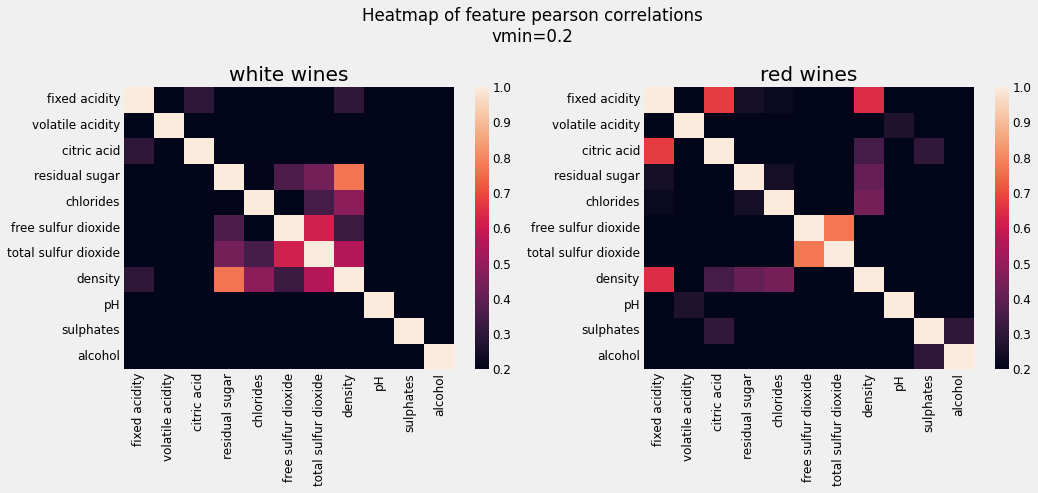

In [115]:
plt.figure(figsize=(15, 7))
vmin=0.2
plt.suptitle('Heatmap of feature pearson correlations\nvmin={}'.format(vmin))
plt.subplot(121)
sns.heatmap(whites_tsfm[features].corr(), vmin=0.2)
plt.title('white wines')
plt.subplot(122)
sns.heatmap(reds_tsfm[features].corr(), vmin=0.2)
plt.title('red wines')
plt.tight_layout(True)
save_fig('heatmaps_vim', resolution=72)
plt.show()

As suspected, density is highly correlated with features for both the red and white wines (to different degrees) and should be dropped. Total sulfur dioxide (the combination of free and dissolved $SO_2$) will also be dropped. pH surprisingly doesn't seem to have a strong correlation as was expected. Fixed Acidity (for reds) is strongly correlated with citric acid, which makes sense as citric acid concentratoin is ~1/20th the fixed acidity (tartaric acid) concentration in wines. 

In [116]:
features_white = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide',
       'pH', 'sulphates', 'alcohol']

In [117]:
features_red = ['fixed acidity', 'volatile acidity', 'residual sugar',
       'chlorides', 'free sulfur dioxide',
       'pH', 'sulphates', 'alcohol']

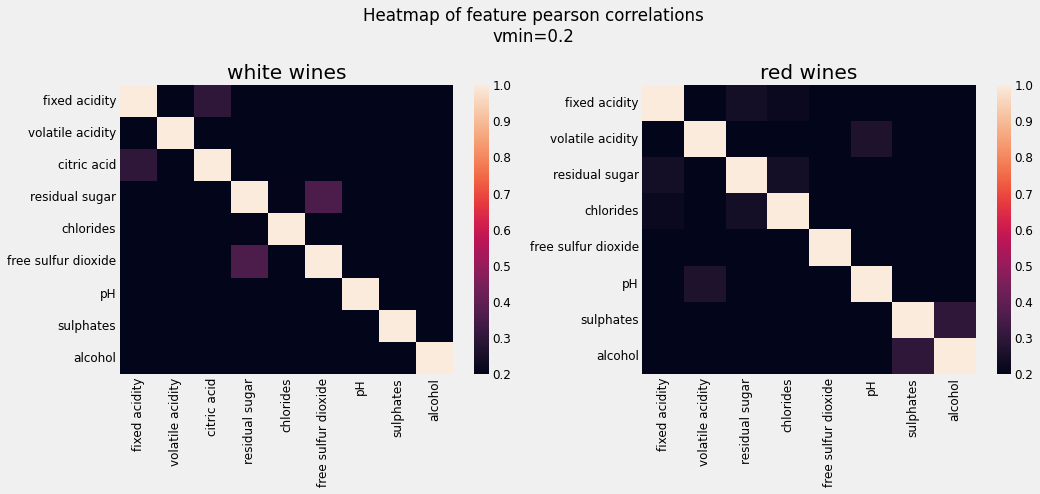

In [118]:
plt.figure(figsize=(15, 7))
vmin=0.2
plt.suptitle('Heatmap of feature pearson correlations\nvmin={}'.format(vmin))
plt.subplot(121)
sns.heatmap(whites_tsfm[features_white].corr(), vmin=0.2)
plt.title('white wines')
plt.subplot(122)
sns.heatmap(reds_tsfm[features_red].corr(), vmin=0.2)
plt.title('red wines')
plt.tight_layout(True)
plt.show()

Saving figure violin_plot_fixed acidity


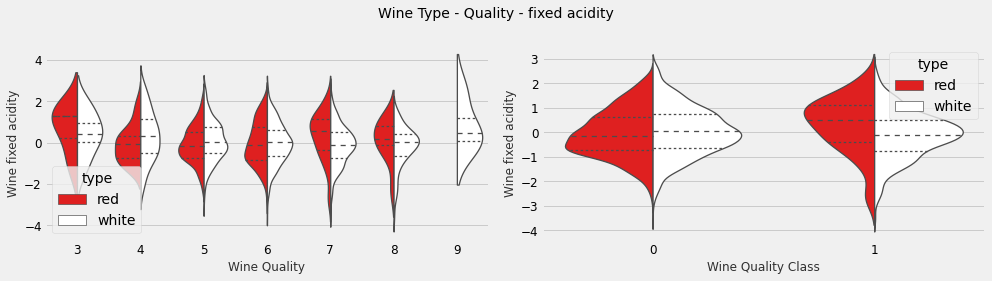

Saving figure violin_plot_volatile acidity


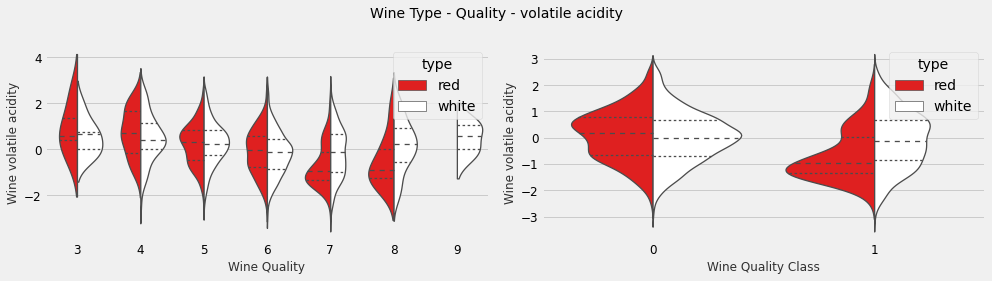

Saving figure violin_plot_citric acid


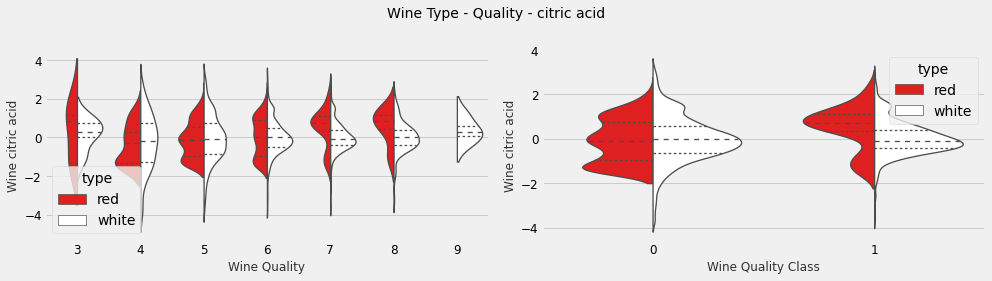

Saving figure violin_plot_residual sugar


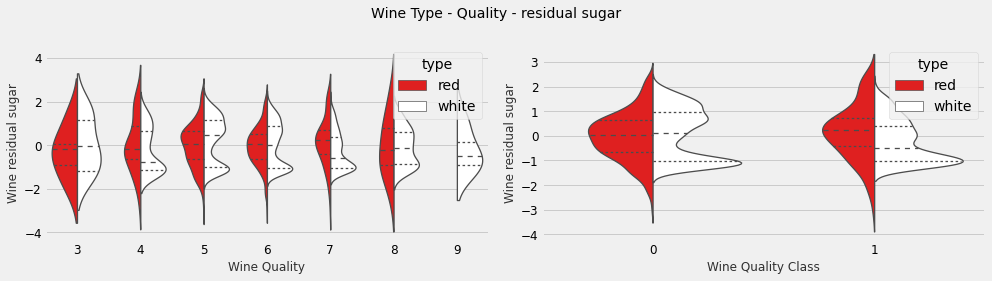

Saving figure violin_plot_chlorides


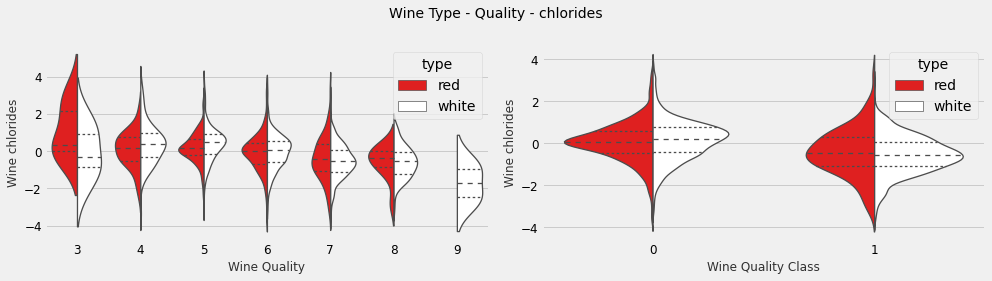

Saving figure violin_plot_free sulfur dioxide


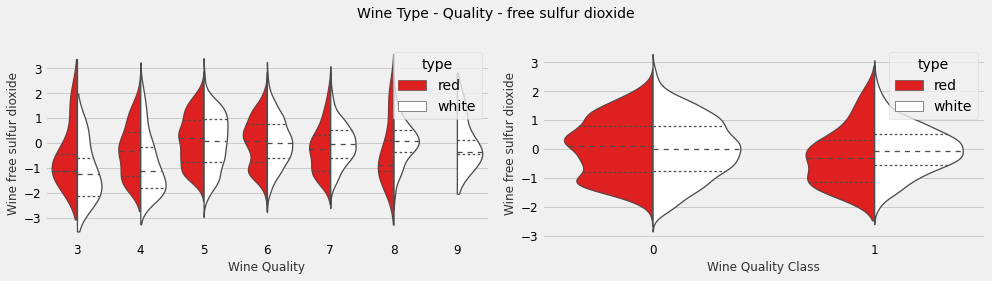

Saving figure violin_plot_total sulfur dioxide


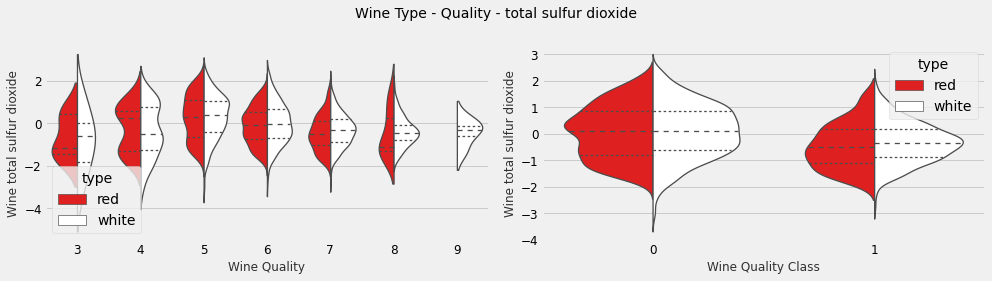

Saving figure violin_plot_density


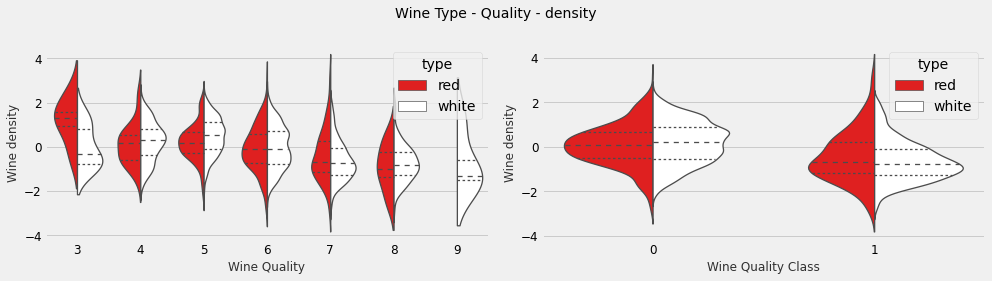

Saving figure violin_plot_pH


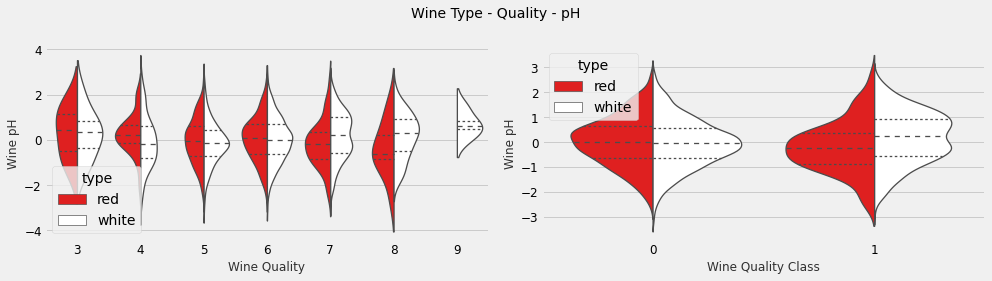

Saving figure violin_plot_sulphates


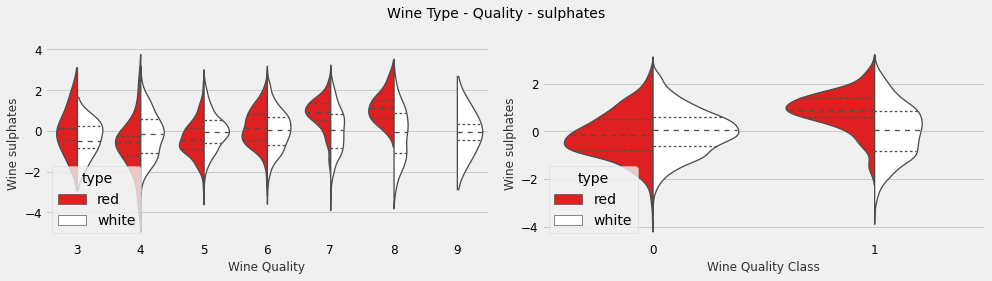

Saving figure violin_plot_alcohol


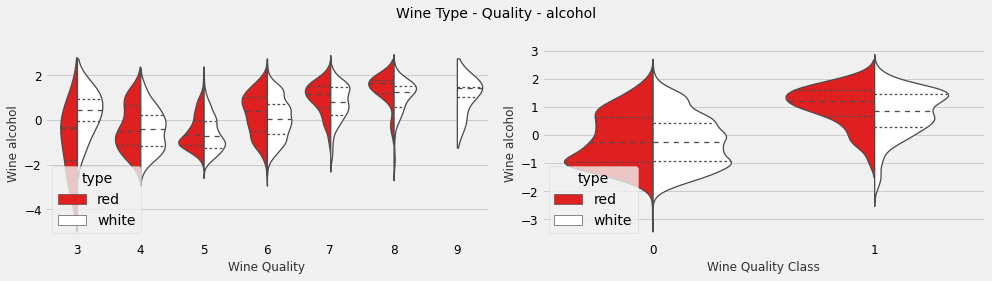

In [120]:
for i in range(len(features)):

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
    f.suptitle(f'Wine Type - Quality - {features[i]}', fontsize=14)

    sns.violinplot(x='quality', y=features[i], hue='type', data=wines_tsfm, split=True, inner='quart', linewidth=1.3,
                   palette=['red','white'], ax=ax1)
    ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
    ax1.set_ylabel(f"Wine {features[i]}",size = 12,alpha=0.8)

    sns.violinplot(x='class', y=features[i], hue='type', data=wines_tsfm, split=True, inner='quart', linewidth=1.3,
                   palette=['red', 'white'], ax=ax2)
    ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
    ax2.set_ylabel(f"Wine {features[i]}",size = 12,alpha=0.8)
    save_fig(f'violin_plot_{features[i]}', resolution=72)
    plt.show()

In [136]:
pd.to_pickle(whites_tsfm, './data/white_train_processed.pkl')

# Wine Inferential Statistics

In [129]:
def find_correlated_features(df, feature_name, threshold=0.7):
    corrs = np.abs(df.corr()[feature_name]).sort_values(ascending=False)
    return corrs[corrs.values > threshold]

In [130]:
features = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

In [131]:
# Look at features whose values are potentially dependent upon other features
dep_feat = ['total sulfur dioxide', 'density', 'pH']

In [132]:
# Scale the data
scaler = MinMaxScaler()
whites_scaled= pd.DataFrame(scaler.fit_transform(whites[features]), columns=whites[features].columns)

scaler = MinMaxScaler()
reds_scaled= pd.DataFrame(scaler.fit_transform(reds[features]), columns=reds[features].columns)

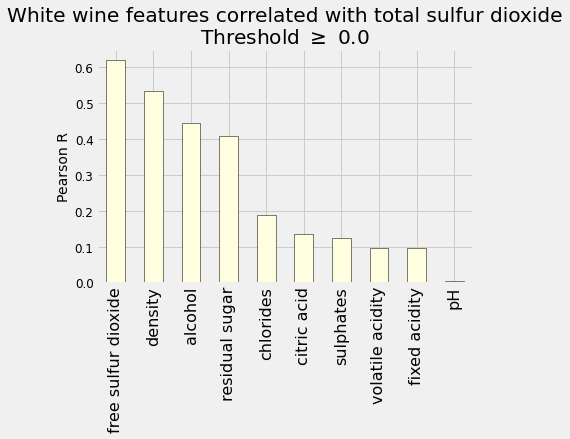

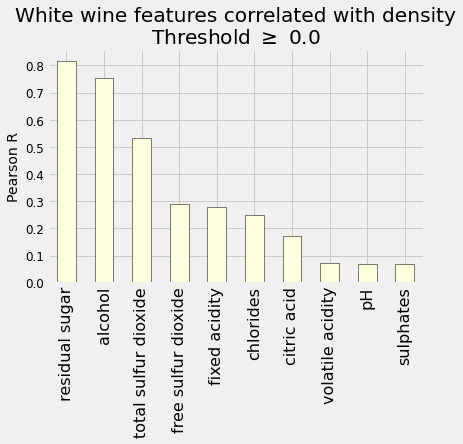

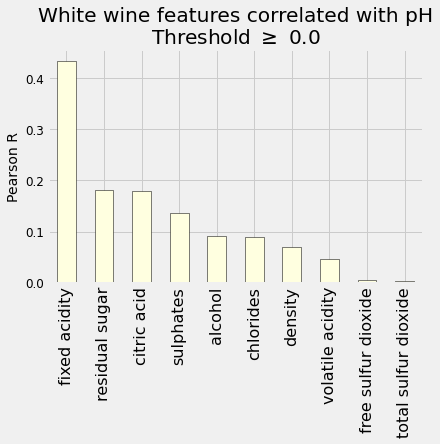

In [133]:
# White wines
threshold=0.00

for feat in dep_feat:
    corrs = find_correlated_features(whites_scaled[features], feat, threshold)
    if corrs.shape[0] > 1:
        corrs.drop(feat, axis=0).plot(kind='bar', edgecolor='k', color='lightyellow')
        plt.title(f'White wine features correlated with {feat}\nThreshold $\geq$ {threshold}')
        plt.ylabel('Pearson R')
        plt.xticks(rotation=90, size=16)
        plt.show()

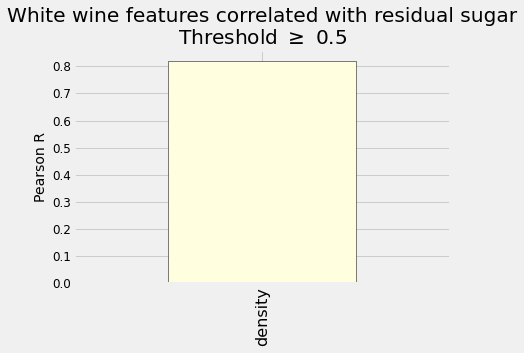

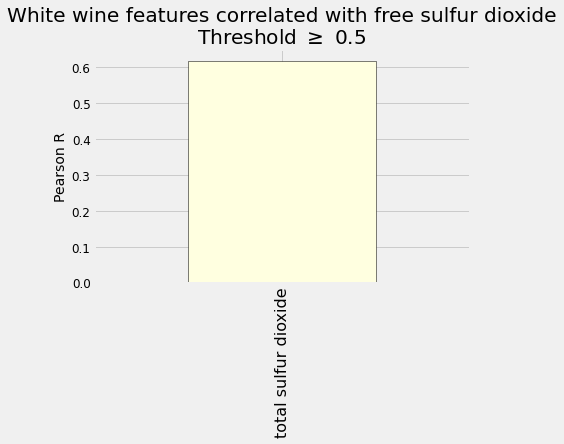

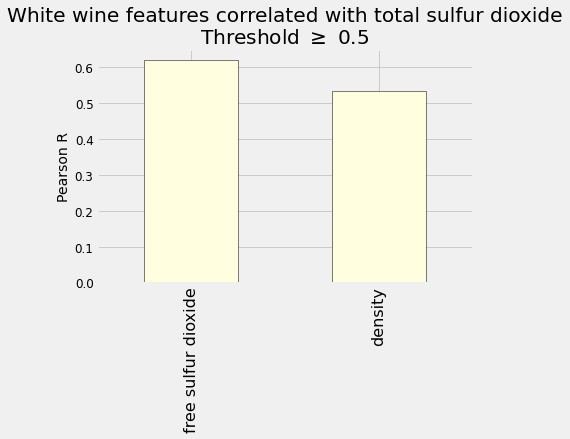

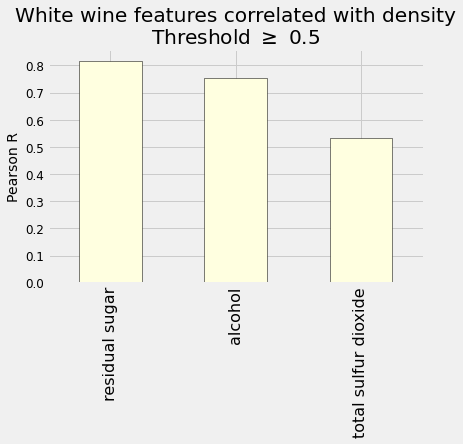

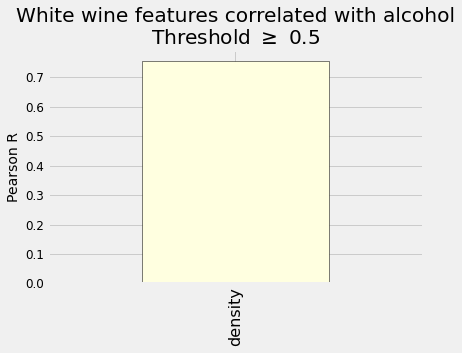

In [134]:
# White wines
threshold=0.50

for feat in features:
    corrs = find_correlated_features(whites_scaled[features], feat, threshold)
    if corrs.shape[0] > 1:
        corrs.drop(feat, axis=0).plot(kind='bar', edgecolor='k', color='lightyellow')
        plt.title(f'White wine features correlated with {feat}\nThreshold $\geq$ {threshold}')
        plt.ylabel('Pearson R')
        plt.xticks(rotation=90, size=16)
        plt.show()

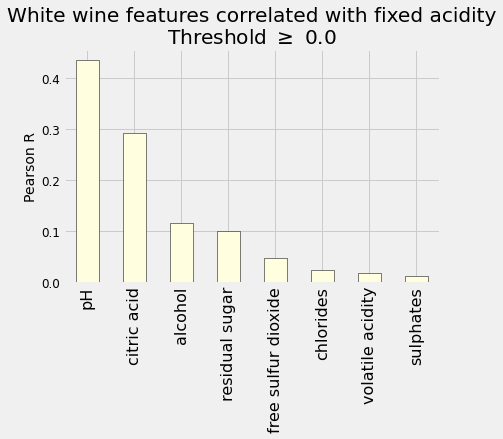

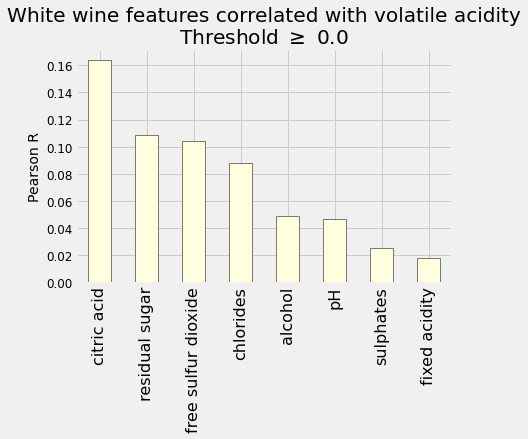

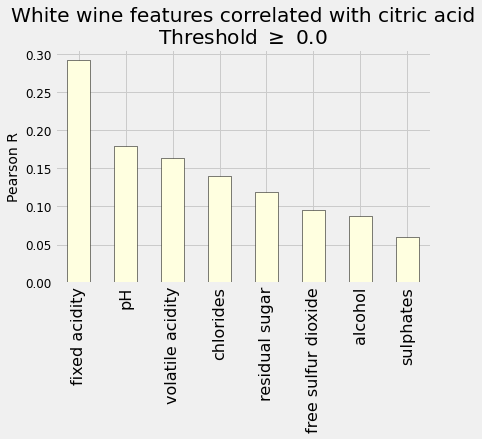

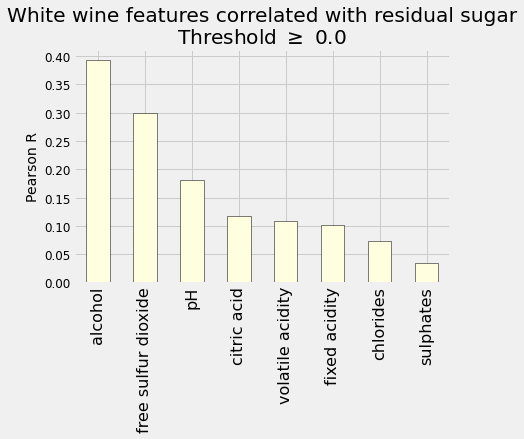

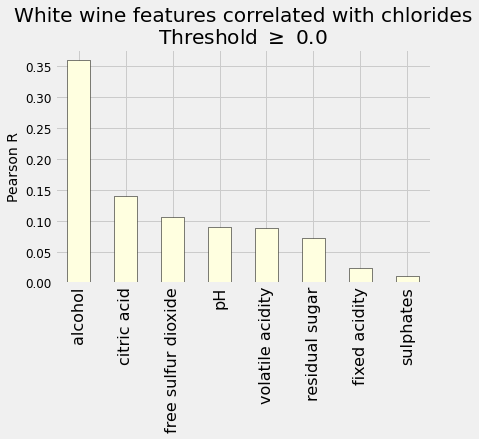

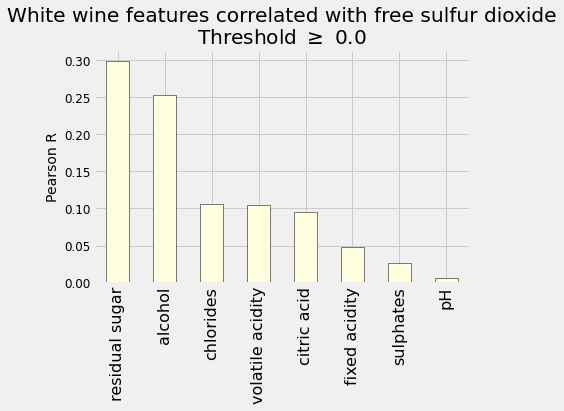

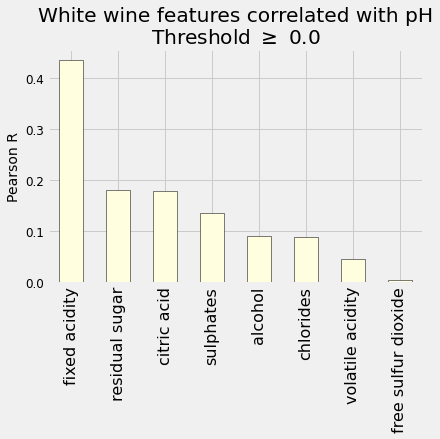

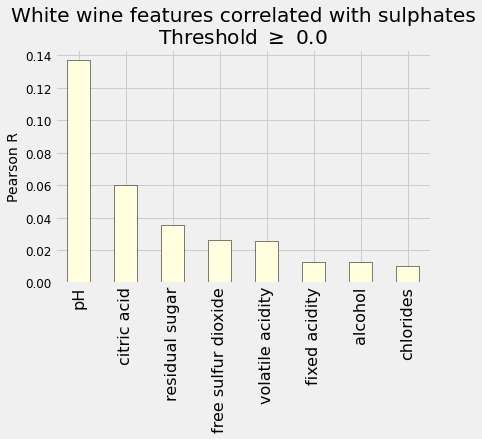

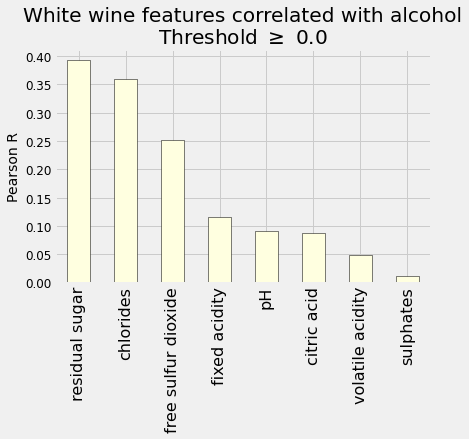

In [135]:
white_features = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide', 'pH', 'sulphates', 'alcohol']
# White wines
threshold=0.00

for feat in white_features:
    
    corrs = find_correlated_features(whites_scaled[white_features], feat, threshold)
    if corrs.shape[0] > 1:
        corrs.drop(feat, axis=0).plot(kind='bar', edgecolor='k', color='lightyellow')
        plt.title(f'White wine features correlated with {feat}\nThreshold $\geq$ {threshold}')
        plt.ylabel('Pearson R')
        plt.xticks(rotation=90, size=16)
        plt.show()

In [ ]:
threshold=0.00

for feat in dep_feat:
    corrs = find_correlated_features(reds_scaled[features], feat, threshold)
    if corrs.shape[0] > 1:
        corrs.drop(feat, axis=0).plot(kind='bar', edgecolor='k', color='red')
        plt.title(f'Red wine features correlated with {feat}\nThreshold $\geq$ {threshold}')
        plt.ylabel('Pearson R')
        plt.xticks(rotation=90, size=16)
        plt.show()

In [ ]:
threshold=0.50

for feat in features:
    corrs = find_correlated_features(reds_scaled[features], feat, threshold)
    if corrs.shape[0] > 1:
        corrs.drop(feat, axis=0).plot(kind='bar', edgecolor='k', color='red')
        plt.title(f'Red wine features correlated with {feat}\nThreshold $\geq$ {threshold}')
        plt.ylabel('Pearson R')
        plt.xticks(rotation=90, size=16)
        plt.show()

In [ ]:
red_features = ['fixed acidity', 'volatile acidity',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'sulphates', 'alcohol']
# White wines
threshold=0.00

for feat in red_features:
    
    corrs = find_correlated_features(reds_scaled[red_features], feat, threshold)
    if corrs.shape[0] > 1:
        corrs.drop(feat, axis=0).plot(kind='bar', edgecolor='k', color='red')
        plt.title(f'Red wine features correlated with {feat}\nThreshold $\geq$ {threshold}')
        plt.ylabel('Pearson R')
        plt.xticks(rotation=90, size=16)
        plt.show()

In [ ]:
sns.heatmap(whites_scaled[features].corr())
plt.show()
sns.heatmap(whites_scaled[white_features].corr())
plt.show()
sns.heatmap(reds_scaled[features].corr())
plt.show()
sns.heatmap(reds_scaled[red_features].corr())
plt.show()

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

outliers = IsolationForest(verbose=True)
white_wine_outliers = outliers.fit_predict(whites[features])
whites['mask'] = white_wine_outliers
white_wines_trnc = whites[whites['mask']==1]

outliers = IsolationForest(verbose=True)
white_wine_outliers = outliers.fit_predict(whites[features])
whites['mask'] = white_wine_outliers
white_wines_trnc = whites[whites['mask']==1]


In [ ]:
def plot_quality_features(wines, features, x_lim=None):
    features = features
    
    reds = wines[wines['type'] == 'red']
    whites = wines[wines['type'] == 'white']
    grouped = wines.groupby('quality').mean()
    x_min, x_max = wines[features].min(), wines[features].max()
    
    from sklearn.linear_model import LinearRegression

    lin_reds = LinearRegression()
    X = reds.groupby('quality').mean()[[features]]
    y = reds.groupby('quality').mean().index
    lin_reds.fit(X, y)
    score_red = lin_reds.score(X, y)

    lin_whites = LinearRegression()
    X = whites.groupby('quality').mean()[[features]]
    y = whites.groupby('quality').mean().index
    lin_whites.fit(X, y)
    score_white = lin_whites.score(X, y)

    plt.figure(figsize=(10,8))
    plt.title("Average {} Values per Wine Quality".format(features))
    plt.scatter(reds.groupby('quality').mean()[features], reds.groupby('quality').mean().index, color='red', edgecolor='k')

    x_fit = np.linspace(wines[features].min(),wines[features].max())
    y_fit_reds = lin_reds.coef_ * x_fit + lin_reds.intercept_
    plt.plot(x_fit, y_fit_reds, color='red')

    plt.scatter(whites.groupby('quality').mean()[features], whites.groupby('quality').mean().index, color='lightyellow', edgecolor='k')

    y_fit_whites = lin_whites.coef_ * x_fit + lin_whites.intercept_

    plt.plot(x_fit, y_fit_whites, color='lightyellow')
    plt.xlabel(f'{features}')
    plt.ylabel('quality score')
    plt.ylim(2,10)
    plt.legend([f'red: {round(score_red, 2)}', f'white: {round(score_white, 2)}'])
    if x_lim:
        plt.xlim(x_lim)
        plt.show()
    else:
        plt.xlim(x_min, x_max)
        plt.show()

In [ ]:
[plot_quality_features(wines, feature) for feature in features]

In [ ]:
sns.scatterplot(data=wines, x='density', y='alcohol', hue='type', palette=['red', 'white'], edgecolor='k')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=whites,
                x='alcohol',
                y='volatile acidity',
                color='lightyellow',
                size='quality',
                sizes=(10,500),
                edgecolor='black',
                linewidth=1)
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=white_wines_trnc,
                x='alcohol',
                y='volatile acidity',
                color='lightyellow',
                size='quality',
                sizes=(10,500),
                edgecolor='black',
                linewidth=1)
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=whites,
                x='alcohol',
                y='volatile acidity',
                color='lightyellow',
                hue='label',
                size='label',
                sizes=(100,450),
                edgecolor='black',
                linewidth=1,
                alpha=0.9)
plt.show()

In [ ]:

outliers = IsolationForest(verbose=True)
red_wine_outliers = outliers.fit_predict(reds[features])
reds['mask'] = red_wine_outliers
red_wines_trnc = reds[reds['mask']==1]

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=reds,
                x='alcohol',
                y='volatile acidity',
                color='red',
                size='quality',
                sizes=(10,500),
                edgecolor='black',
                linewidth=1)
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=red_wines_trnc,
                x='alcohol',
                y='volatile acidity',
                color='red',
                size='quality',
                sizes=(10,500),
                edgecolor='black',
                linewidth=1)
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=red_wines_trnc,
                x='alcohol',
                y='volatile acidity',
                color='red',
                hue='label',
                size='label',
                sizes=(450,100),
                edgecolor='black',
                linewidth=1,
                alpha=0.9)
plt.show()

In [ ]:
from sklearn.preprocessing import PowerTransformer
df = reds.dropna()

# Remove Outliers
mask = IsolationForest(random_state=0).fit_predict(df[features])
df['mask'] = mask
df = df[df['mask'] == 1]
df = df.reset_index(drop=True)

X, y = df[features], df['quality'].apply(lambda x:0 if x<=6 else 1)

# Apply Transformations
X = PowerTransformer().fit_transform(X)

# Reduce Dimensions
reduced = df[['alcohol', 'sulphates']]
reduced = pd.concat([reduced, y], axis=1)

plt.figure(figsize=(12,12))
# Plotting

highs = reduced[reduced['quality']==1]
lows = reduced[reduced['quality']==0]
plt.scatter(highs['alcohol'], highs['sulphates'], color='red', marker='o', alpha=0.6, edgecolor='white', s=300, linewidth=1.5)
plt.scatter(lows['alcohol'], lows['sulphates'], color='maroon', marker='o',alpha=0.8, s=50, edgecolor='white', linewidth=1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Alcohol %')
plt.ylabel('Sulphates (g/L)')
plt.title('Distribution of Red Wines Across 2 Features')
plt.legend(['high quality reds', 'low quality reds'])
plt.show()

In [ ]:
from sklearn.preprocessing import PowerTransformer
df = whites.dropna()

# Remove Outliers
mask = IsolationForest().fit_predict(df[features])
df['mask'] = mask
df = df[df['mask'] == 1]
df = df.reset_index(drop=True)

X, y = df[features], df['quality'].apply(lambda x:0 if x<=6 else 1)

# Apply Transformations
X = PowerTransformer().fit_transform(X)

# Reduce Dimensions
reduced = df[['alcohol', 'chlorides']]
reduced = pd.concat([reduced, y], axis=1)

plt.figure(figsize=(10,10))
# Plotting

highs = reduced[reduced['quality']==1]
lows = reduced[reduced['quality']==0]
plt.scatter(highs['alcohol'], highs['chlorides'], color='white', marker='o', alpha=0.96, edgecolor='green', s=200, linewidth=1)
plt.scatter(lows['alcohol'], lows['chlorides'], color='lightyellow', marker='o',alpha=0.8, s=20, edgecolor='red')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Alcohol %')
plt.ylabel('Chlorides (g/L)')
plt.title('Distribution of White Wines Across 2 Features')

plt.show()

In [ ]:
df = reds.dropna()
from sklearn.ensemble import RandomForestClassifier
X, y = df[features], df['class']
# perform permutation importance
# get importance
importance = results.importances_mean
model = RandomForestClassifier(n_jobs=-1, class_weight='balanced').fit(df[features], df['class'])
results = permutation_importance(model, X, y, scoring='precision')
sns.barplot(x=results.importances_mean, y=features, color='r', edgecolor='k')
plt.xlabel('feature importances')
plt.title('Random Forest Feature Importances for Red Wine')


In [ ]:
df = reds.dropna()
from sklearn.ensemble import RandomForestClassifier
X, y = df[features], df['class']
# perform permutation importance
# get importance
importance = results.importances_mean
model = RandomForestClassifier(n_jobs=-1, class_weight='balanced').fit(df[features], df['class'])
results = permutation_importance(model, X, y, scoring='roc_auc')
sns.barplot(x=results.importances_mean, y=features, color='r', edgecolor='k')
plt.xlabel('feature importances')
plt.title('Random Forest Feature Importances for Red Wine')


In [ ]:
df = reds.dropna()
from sklearn.ensemble import RandomForestClassifier
X, y = df[features], df['class']
# perform permutation importance
# get importance
importance = results.importances_mean
model = RandomForestClassifier(n_jobs=-1, class_weight='balanced').fit(df[features], df['class'])
results = permutation_importance(model, X, y, scoring='f1')
sns.barplot(x=results.importances_mean, y=features, color='r', edgecolor='k')
plt.xlabel('feature importances')
plt.title('Random Forest Feature Importances for Red Wine')


In [ ]:
df = whites.dropna()
from sklearn.ensemble import RandomForestClassifier
X, y = df[features], df['class']
# perform permutation importance
# get importance
importance = results.importances_mean
model = RandomForestClassifier(n_jobs=-1, class_weight='balanced').fit(df[features], df['class'])
results = permutation_importance(model, X, y, scoring='precision')
sns.barplot(x=results.importances_mean, y=features, color='lightyellow', edgecolor='k')
plt.xlabel('feature importances')
plt.title('Random Forest Feature Importances for White Wine')
plt.show()

In [ ]:
df = whites.dropna()
from sklearn.ensemble import RandomForestClassifier
X, y = df[features], df['class']
# perform permutation importance
# get importance
importance = results.importances_mean
model = RandomForestClassifier(n_jobs=-1, class_weight='balanced').fit(df[features], df['class'])
results = permutation_importance(model, X, y, scoring='roc_auc')
sns.barplot(x=results.importances_mean, y=features, color='lightyellow', edgecolor='k')
plt.xlabel('feature importances')
plt.title('Random Forest Feature Importances for White Wine')
plt.show()

In [ ]:
df = whites.dropna()
from sklearn.ensemble import RandomForestClassifier
X, y = df[features], df['class']
# perform permutation importance
# get importance
importance = results.importances_mean
model = RandomForestClassifier(n_jobs=-1, class_weight='balanced').fit(df[features], df['class'])
results = permutation_importance(model, X, y, scoring='f1')
sns.barplot(x=results.importances_mean, y=features, color='lightyellow', edgecolor='k')
plt.xlabel('feature importances')
plt.title('Random Forest Feature Importances for White Wine')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=reds,
                x='alcohol',
                y='sulphates',
                palette=['grey', 'red'],
                hue='label',
                size='label',
                sizes=(350,50),
                edgecolor='black',
                linewidth=1,
                alpha=0.9)
plt.title('Red Wine Quality Scatter Plot of Alcohol vs Sulfates')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=whites,
                x='alcohol',
                y='chlorides',
                palette=['lightyellow', 'grey'],
                hue='label',
                size='label',
                sizes=(50,350),
                edgecolor='black',
                linewidth=1,
                alpha=0.9)
plt.title('White Wine Quality Scatter Plot of Alcohol vs Chlorides')
plt.show()

In [ ]:
results.importances_mean

In [ ]:
df = reds.dropna()
from sklearn.linear_model import LogisticRegression
feat_imp_reds = LogisticRegression(n_jobs=-1, class_weight='balanced').fit(df[features], df['label'])
sns.barplot(x=feat_imp_reds.coef_.flatten(), y=features, color='r')

In [ ]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
from sklearn.svm import SVC
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = SVC()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='precision')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
from sklearn.svm import SVC
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = SVC()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='precision')
# get importance
importance = results.importances_mean

In [ ]:
df = red_wines_trnc.dropna()
from sklearn.ensemble import RandomForestClassifier
feat_imp_reds = RandomForestClassifier(n_jobs=-1, class_weight='balanced').fit(df[features], df['class'])
sns.barplot(x=feat_imp_reds.feature_importances_, y=features, color='r')


In [ ]:
df = reds.dropna()
from sklearn.ensemble import RandomForestClassifier
feat_imp_reds = RandomForestClassifier(n_jobs=-1, class_weight='balanced').fit(df[features], df['class'])

In [ ]:
df = whites.dropna()
from sklearn.ensemble import RandomForestClassifier
feat_imp_whites = RandomForestClassifier(n_jobs=-1, class_weight='balanced').fit(df[features], df['class'])
sns.barplot(x=feat_imp_whites.feature_importances_, y=features, color='lightyellow', edgecolor='k')

In [ ]:
df = white_wines_trnc.dropna()
from sklearn.ensemble import RandomForestClassifier
feat_imp_whites = RandomForestClassifier(n_jobs=-1, class_weight='balanced').fit(df[features], df['class'])
sns.barplot(x=feat_imp_whites.feature_importances_, y=features, color='lightyellow', edgecolor='k')

In [ ]:
transformer = PowerTransformer()
wines_mat = transformer.fit_transform(wines[features])
wines_trsfm = wines.copy(deep=True)
wines_trsfm[features] = wines_mat
outliers = IsolationForest(random_state=0).fit_predict(wines_mat)

In [ ]:
wines_trsfm['outliers'] = outliers
wines_trsfm['outliers'].value_counts()

In [ ]:
reds

# Outliers

In [ ]:
df = reds.copy(deep=True)
transformer = PowerTransformer()
wines_mat = transformer.fit_transform(df[features])

wines_trsfm = df.copy(deep=True)
wines_trsfm[features] = wines_mat

outliers = IsolationForest(random_state=0).fit_predict(wines_mat)

wines_trsfm['outliers'] = outliers
wines_trsfm['outliers'].value_counts()

fig, axes = plt.subplots(4, 3, figsize=(18, 18))
for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    sns.scatterplot(data=wines_trsfm,
                    x='pH',
                    y=features[i],
                    hue='type',
                    palette=['red'],
                    ax=ax,
                    edgecolor='k', 
                    alpha=0.5,
                    label='red wine')
    
    sns.scatterplot(data=wines_trsfm[wines_trsfm['outliers'] == -1],
                    x='pH',
                    y=features[i],
                    ax=ax,
                    color='yellow',
                    edgecolor='k', 
                    alpha=1.0,
                    label='red wine outliers')
    
    sns.scatterplot(data=wines_trsfm[wines_trsfm['label'] == 'high quality'],
                    x='pH',
                    y=features[i],
                    hue='type',
                    palette=['black'],
                    marker='x',
                    ax=ax,
                    edgecolor='k',
                    linewidth=1.0,
                    alpha=1,
                    label='high quality red wines')
    plt.title(features[i])
plt.tight_layout()
plt.show()

In [ ]:
df = reds.copy(deep=True)
transformer = PowerTransformer()
wines_mat = transformer.fit_transform(df[features])

wines_trsfm = df.copy(deep=True)
wines_trsfm[features] = wines_mat

outliers = IsolationForest(random_state=0).fit_predict(wines_mat)

wines_trsfm['outliers'] = outliers
wines_trsfm['outliers'].value_counts()

fig, axes = plt.subplots(4, 3, figsize=(18, 18))
for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    sns.scatterplot(data=wines_trsfm,
                    x='pH',
                    y=features[i],
                    hue='type',
                    palette=['red'],
                    ax=ax,
                    edgecolor='k', 
                    alpha=0.5,
                    label='red wine')
    
    sns.scatterplot(data=wines_trsfm[wines_trsfm['outliers'] == -1],
                    x='pH',
                    y=features[i],
                    ax=ax,
                    color='yellow',
                    edgecolor='k', 
                    alpha=1.0,
                    label='red wine outliers')
    
    sns.scatterplot(data=wines_trsfm[wines_trsfm['label'] == 'high quality'],
                    x='pH',
                    y=features[i],
                    hue='type',
                    palette=['black'],
                    marker='x',
                    ax=ax,
                    edgecolor='k',
                    linewidth=1.0,
                    alpha=1,
                    label='high quality red wines')
    plt.title(features[i])
plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(18, 18))
for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    sns.scatterplot(data=wines_trnc,
                    x='density',
                    y=features[i],
                    hue='type',
                    palette=['lightyellow', 'red'],
                    ax=ax,
                    edgecolor='k', 
                    alpha=0.7)
    plt.title(features[i])
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler,PowerTransformer, QuantileTransformer, StandardScaler, Normalizer

In [ ]:
scalers = {
    'minmax': MinMaxScaler(),
    'yeo-johnson':PowerTransformer(),
    'quantile': QuantileTransformer(),
    'standard': StandardScaler(),
    'ridge': Normalizer(),
    'lasso': Normalizer(norm='l1'),
    'max': Normalizer(norm='max')
}

In [ ]:
for key, value in scalers.items():
    print(key, value)

In [ ]:
for key, value in scalers.items():
    scaled = value.fit_transform(wines[features])
    df = pd.DataFrame(scaled, columns=features)
    df = pd.concat([df, wines['type']], axis=1)

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    for i, ax in enumerate(axes.ravel()):
        if i > 13:
            ax.set_visible(False)
            continue
        sns.scatterplot(data=df,
                        x=acidity[i],
                        y='pH',
                        hue='type',
                        palette=['lightyellow', 'red'],
                        ax=ax,
                        edgecolor='k', 
                        alpha=0.5)
    plt.suptitle(f'{key} scaler')
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
X,y  = wines[features], wines['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [ ]:
select = RFE(RandomForestClassifier(random_state=0),
             n_features_to_select=1)

select.fit(X_train, y_train)
# visualize the selected features:
X_train_rf = select.transform(X_train)
X_test_rf = select.transform(X_test)
rf_pipeline.fit(X_train_rf, y_train).score(X_test_rf, y_test)


pd.DataFrame(list(zip(X.columns, select.ranking_)), 
             columns=['feature', 'ranking']).set_index('feature').sort_values(by='ranking')

In [ ]:
for scaler_name, scaler in scalers.items():
    print(scaler_name, scaler)

In [ ]:
rf_pipeline.set_params = {'steps': [('standardscaler', MinMaxScaler()),
  ('randomforestclassifier',
   RandomForestClassifier(n_jobs=-1, random_state=0))],}

In [ ]:
rf_pipeline.get_params()

In [ ]:
reds

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(reds[features], reds['class'], stratify=reds['class'])
from sklearn.feature_selection import RFE

for scaler_name, scaler in scalers.items():

    
    scaling_pipeline = make_pipeline(scaler, RandomForestClassifier(random_state=0, n_jobs=-1))
    
    k_features = np.arange(1,X_train.shape[1]+1)

    
    model = scaling_pipeline
    scores = []

    for k in k_features:
        select = RFE(RandomForestClassifier(random_state=0),
                     n_features_to_select=k)

        select.fit(X_train, y_train)

        X_train_rfe = select.transform(X_train)
        X_test_rfe = select.transform(X_test)

        model.fit(X_train_rfe, y_train)
        y_pred = model.predict(X_test_rfe)
        scores.append(roc_auc_score(y_test, y_pred))

    plt.title(f'RFE results with {scaler_name} scaling')
    plt.plot(k_features, scores)
    plt.xlabel('features')
    plt.ylabel('roc_auc')
    plt.legend([f'{model}'])
    plt.show()

    print('best score: {:.3f}'.format(scores[np.argmax(scores)]))
    print('number of features to keep: {}'.format(k_features[np.argmax(scores)]))


    # Feature Rankings

    select = RFE(RandomForestClassifier(random_state=0),
                 n_features_to_select=k_features[np.argmax(scores)])

    select.fit(X_train, y_train)
    # visualize the selected features:
    X_train_rf = select.transform(X_train)
    print(X_train.shape)
    print(X_train_rf.shape)
    X_test_rf = select.transform(X_test)
    model.fit(X_train_rf, y_train)


    print(pd.DataFrame(list(zip(X.columns, select.ranking_)), 
                 columns=['feature', 'ranking']).set_index('feature').sort_values(by='ranking'))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(whites[features], whites['class'], stratify=whites['class'])
from sklearn.feature_selection import RFE

for scaler_name, scaler in scalers.items():

    
    scaling_pipeline = make_pipeline(scaler, RandomForestClassifier(random_state=0, n_jobs=-1))
    
    k_features = np.arange(1,X_train.shape[1]+1)

    
    model = scaling_pipeline
    scores = []

    for k in k_features:
        select = RFE(RandomForestClassifier(random_state=0),
                     n_features_to_select=k)

        select.fit(X_train, y_train)

        X_train_rfe = select.transform(X_train)
        X_test_rfe = select.transform(X_test)

        model.fit(X_train_rfe, y_train)
        y_pred = model.predict(X_test_rfe)
        scores.append(roc_auc_score(y_test, y_pred))

    plt.title(f'RFE results with {scaler_name} scaling')
    plt.plot(k_features, scores, color='lightyellow')
    plt.xlabel('features')
    plt.ylabel('roc_auc')
    plt.legend([f'{model}'])
    plt.show()

    print('best score: {:.3f}'.format(scores[np.argmax(scores)]))
    print('number of features to keep: {}'.format(k_features[np.argmax(scores)]))


    # Feature Rankings

    select = RFE(RandomForestClassifier(random_state=0),
                 n_features_to_select=k_features[np.argmax(scores)])

    select.fit(X_train, y_train)
    # visualize the selected features:
    X_train_rf = select.transform(X_train)
    print(X_train.shape)
    print(X_train_rf.shape)
    X_test_rf = select.transform(X_test)
    model.fit(X_train_rf, y_train)


    print(pd.DataFrame(list(zip(X.columns, select.ranking_)), 
                 columns=['feature', 'ranking']).set_index('feature').sort_values(by='ranking'))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(reds[features], reds['class'], stratify=reds['class'])
from sklearn.feature_selection import RFE

for scaler_name, scaler in scalers.items():

    
    scaling_pipeline = make_pipeline(scaler, LogisticRegression(random_state=0, n_jobs=-1))
    
    k_features = np.arange(1,X_train.shape[1]+1)

    
    model = scaling_pipeline
    scores = []

    for k in k_features:
        select = RFE(RandomForestClassifier(random_state=0),
                     n_features_to_select=k)

        select.fit(X_train, y_train)

        X_train_rfe = select.transform(X_train)
        X_test_rfe = select.transform(X_test)

        model.fit(X_train_rfe, y_train)
        y_pred = model.predict(X_test_rfe)
        scores.append(roc_auc_score(y_test, y_pred))

    plt.title(f'RFE results with {scaler_name} scaling')
    plt.plot(k_features, scores)
    plt.xlabel('features')
    plt.ylabel('roc_auc')
    plt.legend([f'{model}'])
    plt.show()

    print('best score: {:.3f}'.format(scores[np.argmax(scores)]))
    print('number of features to keep: {}'.format(k_features[np.argmax(scores)]))


    # Feature Rankings

    select = RFE(RandomForestClassifier(random_state=0),
                 n_features_to_select=k_features[np.argmax(scores)])

    select.fit(X_train, y_train)
    # visualize the selected features:
    X_train_rf = select.transform(X_train)
    print(X_train.shape)
    print(X_train_rf.shape)
    X_test_rf = select.transform(X_test)
    model.fit(X_train_rf, y_train)


    print(pd.DataFrame(list(zip(X.columns, select.ranking_)), 
                 columns=['feature', 'ranking']).set_index('feature').sort_values(by='ranking'))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(whites[features], whites['class'], stratify=whites['class'])
from sklearn.feature_selection import RFE

for scaler_name, scaler in scalers.items():

    
    scaling_pipeline = make_pipeline(scaler, LogisticRegression(random_state=0, n_jobs=-1))
    
    k_features = np.arange(1,X_train.shape[1]+1)

    
    model = scaling_pipeline
    scores = []

    for k in k_features:
        select = RFE(RandomForestClassifier(random_state=0),
                     n_features_to_select=k)

        select.fit(X_train, y_train)

        X_train_rfe = select.transform(X_train)
        X_test_rfe = select.transform(X_test)

        model.fit(X_train_rfe, y_train)
        y_pred = model.predict(X_test_rfe)
        scores.append(roc_auc_score(y_test, y_pred))

    plt.title(f'RFE results with {scaler_name} scaling')
    plt.plot(k_features, scores, color='white')
    plt.xlabel('features')
    plt.ylabel('roc_auc')
    plt.legend([f'{model}'])
    plt.show()

    print('best score: {:.3f}'.format(scores[np.argmax(scores)]))
    print('number of features to keep: {}'.format(k_features[np.argmax(scores)]))


    # Feature Rankings

    select = RFE(RandomForestClassifier(random_state=0),
                 n_features_to_select=k_features[np.argmax(scores)])

    select.fit(X_train, y_train)
    # visualize the selected features:
    X_train_rf = select.transform(X_train)
    print(X_train.shape)
    print(X_train_rf.shape)
    X_test_rf = select.transform(X_test)
    model.fit(X_train_rf, y_train)


    print(pd.DataFrame(list(zip(X.columns, select.ranking_)), 
                 columns=['feature', 'ranking']).set_index('feature').sort_values(by='ranking'))

In [ ]:
rf_pipeline.set_params()

In [ ]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(reds[features], reds['class'], stratify=reds['class'])
from sklearn.feature_selection import RFE

for scaler_name, scaler in scalers.items():

    
    scaling_pipeline = make_pipeline(scaler, SVC())
    
    k_features = np.arange(1,X_train.shape[1]+1)

    
    model = scaling_pipeline
    scores = []

    for k in k_features:
        select = RFE(RandomForestClassifier(random_state=0),
                     n_features_to_select=k)

        select.fit(X_train, y_train)

        X_train_rfe = select.transform(X_train)
        X_test_rfe = select.transform(X_test)

        model.fit(X_train_rfe, y_train)
        y_pred = model.predict(X_test_rfe)
        scores.append(roc_auc_score(y_test, y_pred))

    plt.title(f'RFE results with {scaler_name} scaling')
    plt.plot(k_features, scores)
    plt.xlabel('features')
    plt.ylabel('roc_auc')
    plt.legend([f'{model}'])
    plt.show()

    print('best score: {:.3f}'.format(scores[np.argmax(scores)]))
    print('number of features to keep: {}'.format(k_features[np.argmax(scores)]))


    # Feature Rankings

    select = RFE(RandomForestClassifier(random_state=0),
                 n_features_to_select=k_features[np.argmax(scores)])

    select.fit(X_train, y_train)
    # visualize the selected features:
    X_train_rf = select.transform(X_train)
    print(X_train.shape)
    print(X_train_rf.shape)
    X_test_rf = select.transform(X_test)
    model.fit(X_train_rf, y_train)


    print(pd.DataFrame(list(zip(X.columns, select.ranking_)), 
                 columns=['feature', 'ranking']).set_index('feature').sort_values(by='ranking'))

In [ ]:
for scaler in scalers:

    k_features = np.arange(1,X_train.shape[1]+1)

    from sklearn.feature_selection import RFE
    model = rf_pipeline
    scores = []

    for k in k_features:
        select = RFE(RandomForestClassifier(random_state=0),
                     n_features_to_select=k)

        select.fit(X_train, y_train)

        X_train_rfe = select.transform(X_train)
        X_test_rfe = select.transform(X_test)

        model.fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
        scores.append(roc_auc_score(y_test, select.predict(X_test)))

    plt.title('RFE results')
    plt.plot(k_features, scores)
    plt.xlabel('features')
    plt.ylabel('roc_auc')
    plt.legend([f'{model}'])
    plt.show()

    print('best score: {:.3f}'.format(scores[np.argmax(scores)]))
    print('number of features to keep: {}'.format(k_features[np.argmax(scores)]))


    # Feature Rankings

    select = RFE(RandomForestClassifier(random_state=0),
                 n_features_to_select=k_features[np.argmax(scores)])

    select.fit(X_train, y_train)
    # visualize the selected features:
    X_train_rf = select.transform(X_train)
    print(X_train.shape)
    print(X_train_rf.shape)
    X_test_rf = select.transform(X_test)
    model.fit(X_train_rf, y_train).score(X_test_rf, y_test)


    pd.DataFrame(list(zip(X.columns, select.ranking_)), 
                 columns=['feature', 'ranking']).set_index('feature').sort_values(by='ranking')

In [ ]:
from sklearn.metrics import roc_auc_score
k_features = np.arange(1,X_train.shape[1]+1)

from sklearn.feature_selection import RFE
model = lgr_pipeline
scores = []

for k in k_features:
    select = RFE(RandomForestClassifier(random_state=0),
                 n_features_to_select=k)

    select.fit(X_train, y_train)

    X_train_rfe = select.transform(X_train)
    X_test_rfe = select.transform(X_test)

    model.fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
    scores.append(roc_auc_score(y_test, select.predict(X_test)))

plt.title('RFE results')
plt.plot(k_features, scores)
plt.xlabel('features')
plt.ylabel('roc_auc')
plt.legend([f'{model}'])
plt.show()

print('best score: {:.3f}'.format(scores[np.argmax(scores)]))
print('number of features to keep: {}'.format(k_features[np.argmax(scores)]))


# Feature Rankings

select = RFE(RandomForestClassifier(random_state=0),
             n_features_to_select=k_features[np.argmax(scores)])

select.fit(X_train, y_train)
# visualize the selected features:
X_train_rf = select.transform(X_train)
print(X_train.shape)
print(X_train_rf.shape)
X_test_rf = select.transform(X_test)
model.fit(X_train_rf, y_train).score(X_test_rf, y_test)


pd.DataFrame(list(zip(X.columns, select.ranking_)), 
             columns=['feature', 'ranking']).set_index('feature').sort_values(by='ranking')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=0, n_jobs=-1))
lgr_pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=0, n_jobs=-1))

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'standardscaler': [StandardScaler(),
                       MinMaxScaler(), 
                       Normalizer(),
                       QuantileTransformer(), 
                       PowerTransformer(),
                       None]
}
rf_cv = GridSearchCV(rf_pipeline, param_grid=param_grid, cv=5, scoring='roc_auc')
rf_cv.fit(X_train, y_train)


In [ ]:
pd.DataFrame(rf_cv.cv_results_)

In [ ]:
lgr_cv = GridSearchCV(lgr_pipeline, param_grid=param_grid, cv=5, scoring='roc_auc')
lgr_cv.fit(X_train, y_train)

In [ ]:
pd.DataFrame(lgr_cv.cv_results_)

In [ ]:
# Number of outliers
from sklearn.ensemble import IsolationForest

lof = IsolationForest()
red_outliers = lof.fit_predict(reds[features])
white_outliers = lof.fit_predict(whites[features])
outliers = lof.fit_predict(wines[features])

# Number of outliers

#outliers = IsolationForest().fit(X[features])
#Counter(outliers.predict(X[features]))

In [ ]:
wines['mask'] = outliers

In [ ]:
wines['mask'].value_counts()
wines_no_outliers = wines[wines['mask'] == 1]

In [ ]:
X, y = wines_no_outliers[features], wines_no_outliers['class']
X_train, X_test, y_train, y_test =  train_test_split(X, y, stratify=y, random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'standardscaler': [StandardScaler(),
                       MinMaxScaler(), 
                       Normalizer(),
                       QuantileTransformer(), 
                       PowerTransformer(),
                       None]
}
rf_cv = GridSearchCV(rf_pipeline, param_grid=param_grid, cv=5, scoring='roc_auc')
rf_cv.fit(X_train, y_train)
pd.DataFrame(rf_cv.cv_results_)

In [ ]:
lgr_cv = GridSearchCV(lgr_pipeline, param_grid=param_grid, cv=5, scoring='roc_auc')
lgr_cv.fit(X_train, y_train)
pd.DataFrame(lgr_cv.cv_results_)

In [ ]:
data = pipe.fit_transform(wines[features])
transformed = pd.DataFrame(data, columns = features)
transformed = pd.concat([transformed, wines['type']], axis=1)

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, ax in enumerate(axes.ravel()):
    if i > 13:
        ax.set_visible(False)
        continue
    sns.scatterplot(data=transformed,
                    x=acidity[i],
                    y='pH',
                    hue='type',
                    palette=['lightyellow', 'red'],
                    ax=ax,
                    edgecolor='k', 
                    alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
reds['mask'] = red_outliers
reds_outliers = reds[reds['mask'] == 1]

whites['mask'] = white_outliers
white_outliers = whites[whites['mask'] == 1]


In [ ]:
sns.scatterplot(data=wines, x='pH', y='citric acid', hue='type')
plt.xlim(2.5, 4.5)
plt.ylim(0, 1.2)
plt.show()
sns.scatterplot(data=no_outliers, x='pH', y='citric acid', hue='type')
plt.xlim(2.5, 4.5)
plt.ylim(0, 1.2)
plt.show()

In [ ]:
no_outliers = reds_outliers.append(white_outliers)


In [ ]:
data = pipe.fit_transform(no_outliers[features])
transformed = pd.DataFrame(data, columns = features)
transformed = pd.concat([transformed, wines['type']], axis=1)

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, ax in enumerate(axes.ravel()):
    if i > 13:
        ax.set_visible(False)
        continue
    sns.scatterplot(data=transformed,
                    x=acidity[i],
                    y='pH',
                    hue='type',
                    palette=['lightyellow', 'red'],
                    ax=ax,
                    edgecolor='k', 
                    alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
scalers = [MinMaxScaler(), PowerTransformer(), QuantileTransformer(), StandardScaler(), Normalizer()]
for scaler in scalers:
    scaler.fit_transform(wines[features])

In [ ]:
fig, ax = plt.subplots(1,3)

sns.scatterplot(data=wines,
                x='fixed acidity',
                y='pH', 
                hue='type',
                palette=['lightyellow', 'red'],
                edgecolor='k',
                alpha=0.7)
plt.title('Fixed Acidity vs pH')
plt.show()

In [ ]:
for i in range(len(features)):

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
    f.suptitle(f'Wine Type - Quality - {features[i]}', fontsize=14)

    sns.violinplot(x='quality', y=features[i], hue='type', data=wines, split=True, inner='quart', linewidth=1.3,
                   palette={'red': '#FF9999', 'white': 'white'}, ax=ax1)
    ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
    ax1.set_ylabel(f"Wine {features[i]}",size = 12,alpha=0.8)

    sns.violinplot(x='quality_label', y=features[i], hue='type', data=wines, split=True, inner='quart', linewidth=1.3,
                   palette={'red': '#FF9999', 'white': 'white'}, ax=ax2)
    ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
    ax2.set_ylabel(f"Wine {features[i]}",size = 12,alpha=0.8)
    plt.show()

In [ ]:
sns.boxplot(data=wines, x='fixed acidity', hue='type', palette=['white', 'red'])

# Feature Categories

In [ ]:
features = wines.drop(['type', 'quality', 'quality_label'], axis=1).columns

# Numeric vs. Categorical EDA

In [ ]:
for i in range(len(features)):
    fig, ax = plt.subplots(figsize=(15, 8))

    sns.boxplot(y='type', x=features[i], data=wines, orient="h", ax=ax, hue='type', palette=['white', 'red'])

    ax.get_yaxis().set_visible(False)

    fig.suptitle(f"{features[i]} box plot")

    color_patches = [
        Patch(facecolor="red", label="red wines"),
        Patch(facecolor="white", label="white wines")
    ]
    ax.legend(handles=color_patches)
    plt.ylabel('wine type')
    plt.show()

In [ ]:
features

In [ ]:
wines_trnc['type'] == 'red'

In [ ]:
wines['mask'] = wine_outliers
wines_trnc = wines[wines['mask']==1]
reds_trnc = wines_trnc[wines_trnc['type'] == 'red'].reset_index(drop=True)
whites_trnc = wines_trnc[wines_trnc['type'] == 'white'].reset_index(drop=True)

In [ ]:
df = reds
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(df[features], df['quality'].apply(lambda x:0 if x<=6 else 1))

from sklearn.feature_selection import RFE
model = LogisticRegression(class_weight='balanced')
scores = []
for k in k_features:
    select = RFE(RandomForestClassifier(random_state=0),
                 n_features_to_select=k)

    select.fit(X_train, y_train)

    X_train_rfe = select.transform(X_train)
    X_test_rfe = select.transform(X_test)

    y_pred = model.fit(X_train_rfe, y_train).predict(X_test_rfe)
    scores.append(roc_auc_score(y_test, y_pred))

plt.title('RFE results')
plt.plot(k_features, scores)
plt.xlabel('features')
plt.ylabel('accuracy')
plt.legend([f'{model}'])
plt.show()

print('best score: {:.3f}'.format(scores[np.argmax(scores)]))
print('number of features to keep: {}'.format(k_features[np.argmax(scores)]))


# Feature Rankings

select = RFE(RandomForestClassifier(random_state=0),
             n_features_to_select=k_features[np.argmax(scores)])

select.fit(X_train, y_train)
# visualize the selected features:
X_train_rf = select.transform(X_train)
print(X_train.shape)
print(X_train_rf.shape)
X_test_rf = select.transform(X_test)
model.fit(X_train_rf, y_train).score(X_test_rf, y_test)


pd.DataFrame(list(zip(X.columns, select.ranking_)), 
             columns=['feature', 'ranking']).set_index('feature').sort_values(by='ranking')

In [ ]:
len(reds_trnc)

In [ ]:
df = reds_trnc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(df[features], df['quality'].apply(lambda x:0 if x<=6 else 1))

from sklearn.feature_selection import RFE
model = LogisticRegression(class_weight='balanced')
scores = []
for k in k_features:
    select = RFE(RandomForestClassifier(random_state=0),
                 n_features_to_select=k)

    select.fit(X_train, y_train)

    X_train_rfe = select.transform(X_train)
    X_test_rfe = select.transform(X_test)

    y_pred = model.fit(X_train_rfe, y_train).predict(X_test_rfe)
    scores.append(roc_auc_score(y_test, y_pred))

plt.title('RFE results')
plt.plot(k_features, scores)
plt.xlabel('features')
plt.ylabel('accuracy')
plt.legend([f'{model}'])
plt.show()

print('best score: {:.3f}'.format(scores[np.argmax(scores)]))
print('number of features to keep: {}'.format(k_features[np.argmax(scores)]))


# Feature Rankings

select = RFE(RandomForestClassifier(random_state=0),
             n_features_to_select=k_features[np.argmax(scores)])

select.fit(X_train, y_train)
# visualize the selected features:
X_train_rf = select.transform(X_train)
print(X_train.shape)
print(X_train_rf.shape)
X_test_rf = select.transform(X_test)
model.fit(X_train_rf, y_train).score(X_test_rf, y_test)


pd.DataFrame(list(zip(X.columns, select.ranking_)), 
             columns=['feature', 'ranking']).set_index('feature').sort_values(by='ranking')

In [ ]:
df = whites
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(df[features], df['quality'].apply(lambda x:0 if x<=6 else 1))

from sklearn.feature_selection import RFE
model = LogisticRegression(class_weight='balanced')
scores = []
for k in k_features:
    select = RFE(RandomForestClassifier(random_state=0),
                 n_features_to_select=k)

    select.fit(X_train, y_train)

    X_train_rfe = select.transform(X_train)
    X_test_rfe = select.transform(X_test)

    y_pred = model.fit(X_train_rfe, y_train).predict(X_test_rfe)
    scores.append(roc_auc_score(y_test, y_pred))

plt.title('RFE results')
plt.plot(k_features, scores)
plt.xlabel('features')
plt.ylabel('accuracy')
plt.legend([f'{model}'])
plt.show()

print('best score: {:.3f}'.format(scores[np.argmax(scores)]))
print('number of features to keep: {}'.format(k_features[np.argmax(scores)]))


# Feature Rankings

select = RFE(RandomForestClassifier(random_state=0),
             n_features_to_select=k_features[np.argmax(scores)])

select.fit(X_train, y_train)
# visualize the selected features:
X_train_rf = select.transform(X_train)
print(X_train.shape)
print(X_train_rf.shape)
X_test_rf = select.transform(X_test)
model.fit(X_train_rf, y_train).score(X_test_rf, y_test)


pd.DataFrame(list(zip(X.columns, select.ranking_)), 
             columns=['feature', 'ranking']).set_index('feature').sort_values(by='ranking')

In [ ]:
from sklearn.ensemble import IsolationForest
outliers = IsolationForest(verbose=True)
wine_outliers = outliers.fit_predict(wines[features])
wines['mask'] = wine_outliers
wines_trnc = wines[wines['mask']==1]

In [ ]:
wines['mask'] = wine_outliers
wines_trnc = wines[wines['mask']==1]


In [ ]:
for i in range(len(features)):

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
    f.suptitle(f'Wine Type - Quality - {features[i]}', fontsize=14)

    sns.violinplot(x='quality', y=features[i], hue='type', data=wines, split=True, inner='quart', linewidth=1.3,
                   palette=['red','white'], ax=ax1)
    ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
    ax1.set_ylabel(f"Wine {features[i]}",size = 12,alpha=0.8)

    sns.violinplot(x='label', y=features[i], hue='type', data=wines, split=True, inner='quart', linewidth=1.3,
                   palette=['red', 'white'], ax=ax2)
    ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
    ax2.set_ylabel(f"Wine {features[i]}",size = 12,alpha=0.8)
    plt.show()

In [ ]:



from sklearn.preprocessing import PowerTransformer
df = reds.dropna()

# Remove Outliers
mask = IsolationForest(random_state=0).fit_predict(df[features])
df['mask'] = mask
df = df[df['mask'] == 1]
df = df.reset_index(drop=True)

X, y = df[features], df['quality'].apply(lambda x:0 if x<=6 else 1)

# Apply Transformations
X = PowerTransformer().fit_transform(X)

# Reduce Dimensions
reduced = df[['alcohol', 'sulphates']]
reduced = pd.concat([reduced, y], axis=1)

# Plotting

highs = reduced[reduced['quality']==1]
lows = reduced[reduced['quality']==0]

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=True)
f.patch.set_facecolor('white')
f.patch.set_alpha(0.0)

ax1 = plt.scatter(highs['alcohol'], highs['sulphates'], color='red', marker='o', alpha=0.6, edgecolor='white', s=300, linewidth=1.5)
ax1 = plt.scatter(lows['alcohol'], lows['sulphates'], color='maroon', marker='o',alpha=0.8, s=50, edgecolor='white', linewidth=1)
# Remove Outliers



plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Alcohol %')
plt.ylabel('Chlorides (g/L)')
plt.title('Distribution of Red Wines Across 2 Features')
plt.legend(['high quality whites', 'low quality whites'])
plt.show()

In [ ]:
len(reds)

# Slides

# Bar Charts

In [ ]:
sns.countplot(data=reds, x='quality')


In [ ]:
sns.countplot(data=whites, x='quality', color='lightyellow', edgecolor='k')
plt.title('White Wines Quality Distribution (0-10)')

In [ ]:
sns.countplot(data=reds, x='quality', color='red', edgecolor='k')
plt.title('Red Wines Quality Distribution (0-10)')

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
f.patch.set_facecolor('white')
f.patch.set_alpha(0.0)


f.suptitle('Wine Quality Measurements vs Alcohol % \n Violin Plots', fontsize=16, c='white')

sns.histplot(x='quality',
                data=reds,
                hue='label',
                palette=['indianred', 'red'],
                stat= 'frequency',
                alpha=1.0,
                ax=ax1)
ax1.spines['top'].set_color(None)
ax1.spines['bottom'].set_color(None)
ax1.spines['left'].set_color(None)
ax1.spines['right'].set_color(None)
ax1.xaxis.label.set_color('white')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')
ax1.set_xlabel("Wine Quality",size = 14, c='white')
ax1.set_ylabel("Alcohol %",size = 16, c='white')
ax1.patch.set_facecolor('white')
ax1.patch.set_alpha(0.0)
ax1.legend(loc='upper left')

ax1.set_title('Alcohol vs Quality', c='white')
sns.histplot(x='quality',
                data=whites, 
                stat='frequency', 
                hue='label',
                palette=['lightyellow', 'palegoldenrod'],
                edgecolor='black',
                alpha=1.0,
                ax=ax2)
ax2.set_title('Alcohol vs Quality Class', c='white')
ax2.spines['top'].set_color(None)
ax2.spines['bottom'].set_color(None)
ax2.spines['left'].set_color(None)
ax2.spines['right'].set_color(None)
ax2.xaxis.label.set_color('white')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')
ax2.set_xlabel("Wine Quality Class",size = 14, c='white')
ax2.set_ylabel('')
ax2.patch.set_facecolor('white')
ax2.patch.set_alpha(0.0)
plt.savefig('./slides/figures/plots/hist_plot_quality', bbox_inches='tight',facecolor=f.get_facecolor(), edgecolor='none')

# If we don't specify the edgecolor and facecolor for the figure when
# saving with savefig, it will override the value we set earlier
plt.show()

# Scatter Plot

In [ ]:
reds = pd.read_pickle('./data/red_train.pkl')
reds['label'] = reds['quality'].apply(lambda x:0 if x <=6 else 1)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), sharey=False)
f.patch.set_facecolor('white')
f.patch.set_alpha(0.0)
tranformer = PowerTransformer()
reds_tsfm = reds.copy(deep=True)
reds_tsfm[features] = tranformer.fit_transform(reds[features])
reds_tsfm['mask'] = IsolationForest(random_state=0).fit_predict(reds_tsfm[features])
whites_tsfm = whites.copy(deep=True)
whites_tsfm[features] = tranformer.fit_transform(whites[features])


f.suptitle('Significant Wine Features vs Alcohol % \n Scatter Plots', fontsize=16, c='white')

sns.scatterplot(x='sulphates',
                y='alcohol',
                data=reds_tsfm,
                hue='label',
                palette=['indianred', 'red'],
                edgecolor='black',
                size='label',
                sizes=[50,200],
                ax=ax1)

ax1.set_title('Sulphates vs Alcohol Red Wines', c='white')
ax1.spines['top'].set_color(None)
ax1.spines['bottom'].set_color(None)
ax1.spines['left'].set_color(None)
ax1.spines['right'].set_color(None)
ax1.xaxis.label.set_color('white')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')
ax1.set_xlabel("Sulphates",size = 14, c='white')
ax1.set_ylabel("Alcohol %",size = 16, c='white')
ax1.patch.set_facecolor('white')
ax1.patch.set_alpha(0.0)
ax1.legend(['high', 'low'], loc='best')

sns.scatterplot(x='volatile acidity',
                y='alcohol',
                data=whites_tsfm[:len(reds)], 
                hue='label',
                palette=['palegoldenrod', 'lightyellow'],
                edgecolor='black',
                ax=ax2, 
                size='label',
                sizes=[50,200])

ax2.set_title('Volatile Acidity vs Alcohol White Wines', c='white')
ax2.spines['top'].set_color(None)
ax2.spines['bottom'].set_color(None)
ax2.spines['left'].set_color(None)
ax2.spines['right'].set_color(None)
ax2.xaxis.label.set_color('white')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')
ax2.set_xlabel("Volatile Acidity (g/L)",size = 14, c='white')
ax2.set_ylabel('Alcohol %', size= 16, c='white')
ax2.patch.set_facecolor('white')
ax2.patch.set_alpha(0.0)
ax2.legend(['high', 'low', ], loc='best')
plt.savefig('./slides/figures/plots/scatter_plot_alcohol_vs.png', bbox_inches='tight',facecolor=f.get_facecolor(), edgecolor='none')

# If we don't specify the edgecolor and facecolor for the figure when
# saving with savefig, it will override the value we set earlier
plt.show()

# Violin Plot

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
f.patch.set_facecolor('white')
f.patch.set_alpha(0.0)


f.suptitle('Wine Quality Measurements vs Alcohol % \n Violin Plots', fontsize=16, c='white')

sns.violinplot(x='quality', y='alcohol', hue='type', data=wines, split=True, inner='stick', linewidth=2, linecolor='blue',
               palette=['red','lightyellow'], ax=ax1)
ax1.spines['top'].set_color(None)
ax1.spines['bottom'].set_color(None)
ax1.spines['left'].set_color(None)
ax1.spines['right'].set_color(None)
ax1.xaxis.label.set_color('white')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')
ax1.set_xlabel("Wine Quality",size = 14, c='white')
ax1.set_ylabel("Alcohol %",size = 16, c='white')
ax1.patch.set_facecolor('white')
ax1.patch.set_alpha(0.0)
ax1.legend(loc='upper left')

ax1.set_title('Alcohol vs Quality', c='white')
sns.violinplot(x='label', y='alcohol', hue='type', data=wines, split=True, inner='quartile', linewidth=1.5,
               palette=['red', 'lightyellow'], ax=ax2)
ax2.set_title('Alcohol vs Quality Class', c='white')
ax2.spines['top'].set_color(None)
ax2.spines['bottom'].set_color(None)
ax2.spines['left'].set_color(None)
ax2.spines['right'].set_color(None)
ax2.xaxis.label.set_color('white')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')
ax2.set_xlabel("Wine Quality Class",size = 14, c='white')
ax2.set_ylabel('')
ax2.patch.set_facecolor('white')
ax2.patch.set_alpha(0.0)
plt.legend(['Q1', 'Q2', 'Q3'])
plt.savefig('./slides/figures/plots/violin_plot_alcohol_quality.png', bbox_inches='tight',facecolor=f.get_facecolor(), edgecolor='none')

# If we don't specify the edgecolor and facecolor for the figure when
# saving with savefig, it will override the value we set earlier
plt.show()

In [ ]:
reds_trnc = wines_trnc[wines_trnc['type'] == 'red']
whites_trnc = wines_trnc[wines_trnc['type'] == 'white']

subset_attributes = wines.columns
rs = round(wines_trnc.loc[wines_trnc.type == 'red', subset_attributes].describe(),2)
ws = round(wines_trnc.loc[wines_trnc.type == 'white', subset_attributes].describe(),2)
pd.concat([rs, ws], axis=0, keys=['Red Wine Statistics', 'White Wine Statistics']).T

In [ ]:
for i in range(len(features)):

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
    f.suptitle(f'Wine Type - Quality - {features[i]}', fontsize=14)

    sns.violinplot(x='quality', y=features[i], hue='type', data=wines_trnc, split=True, inner='quart', linewidth=1.3,
                   palette=['red','white'], ax=ax1)
    ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
    ax1.set_ylabel(f"Wine {features[i]}",size = 12,alpha=0.8)

    sns.violinplot(x='label', y=features[i], hue='type', data=wines_trnc, split=True, inner='quart', linewidth=1.3,
                   palette=['red', 'white'], ax=ax2)
    ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
    ax2.set_ylabel(f"Wine {features[i]}",size = 12,alpha=0.8)
    plt.show()

In [ ]:
for i in range(len(features)):

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
    f.suptitle(f'Wine Type - Quality - {features[i]}', fontsize=14)

    sns.violinplot(x='quality', y=features[i], hue='type', data=wines_trnc, split=True, inner='quart', linewidth=1.3,
                   palette={'red': '#FF9999', 'white': 'white'}, ax=ax1)
    ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
    ax1.set_ylabel(f"Wine {features[i]}",size = 12,alpha=0.8)

    sns.violinplot(x='label', y=features[i], hue='type', data=wines_trnc, split=True, inner='quart', linewidth=1.3,
                   palette={'red': '#FF9999', 'white': 'white'}, ax=ax2)
    ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
    ax2.set_ylabel(f"Wine {features[i]}",size = 12,alpha=0.8)
    plt.show()

In [ ]:
corr = wines.corr()
top_corr_cols = corr.type.sort_values(ascending=False).keys()
top_corr = corr.loc[top_corr_cols, top_corr_cols]
dropSelf = np.zeros_like(top_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
plt.figure(figsize=(18, 10))
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)
sns.set(font_scale=1.5)
plt.show()
del corr, dropSelf, top_corr

In [ ]:
target

Alcohol is less dense than water, so it makes sense that an increase in alcohol concentration reduces the overall wine density.